<h2>Loan Defaulter Project</h2>
<p>We have dealt with the missing values and carried out most of the preprocessing required for the task as can be viewed from the file <code>Deal_with_missing_values.ipynb</code>. However, in this file, we would again try to preprocess the data and prepare the data for modelling. We would also compute some key insights from the data using Exploratory Data Analysis Techniques where multiple Statistical Tests are done to gain insights along with using Probability to compute the important information.</p>

In [1]:
# Importing numpy, pandas, matplotlib and seaborn :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for handling the warnings:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
orig_data = pd.read_csv('Final_Loan_Data.csv')
orig_data = orig_data.drop(['Unnamed: 0'], axis=1)
orig_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [3]:
# no missing values exist for this dataset:
orig_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [4]:
# columns name of orig_data:
feats_orig = list(orig_data.columns)
cat_feats_orig = []
num_feats_orig = []

# distincting features:
for feature in feats_orig:
    if orig_data[feature].nunique() > 10:
        num_feats_orig.append(feature)
    else:
        cat_feats_orig.append(feature)

print('Categorical Feature: ', cat_feats_orig, end='\n\n')
print('Numerical Features: ', num_feats_orig)

Categorical Feature:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

Numerical Features:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [5]:
# creating a copy of original data:
orig_copy_data = orig_data.copy()
num_data = orig_copy_data[num_feats_orig]
cat_data = orig_copy_data[cat_feats_orig]

<h2>Distribution of Numerical Features and Univariate Outliers Investigation:</h2>

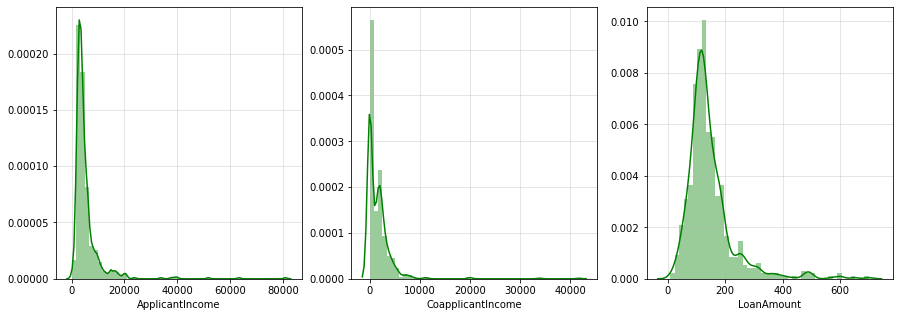

In [6]:
# pdf of numerical features:
plt.figure(figsize=(15, 5))
k = 1
for num_feat in num_feats_orig:
    plt.subplot(1, 3, k);
    sns.distplot(orig_copy_data[num_feat], color='green')
    plt.grid(True, alpha=0.4)
    k +=1

<h3>Distribution of Numerical Features:</h3>
<p>
<ol>
    <li>The distribution of almost all of numerical feature is highly right skewed.</li>
    <li>In order to make them Gaussian or Normally Distributed, we can use Logarithmic Transformation to reduce the number of outliers in the data as well as reduce the scale of the feature.</li>
    </ol>
</p>

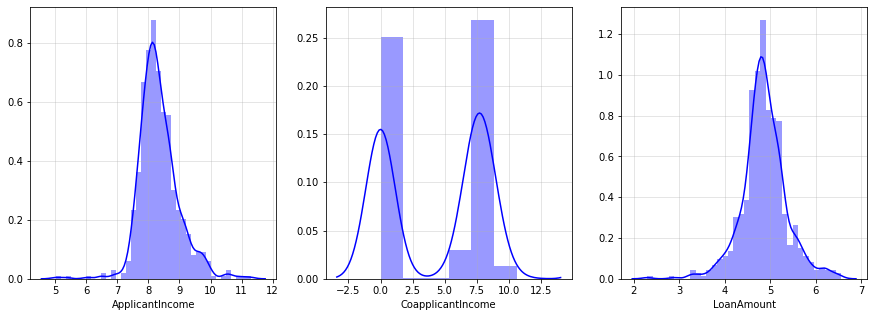

In [7]:
# log transformation of numerical features:
plt.figure(figsize=(15, 5))
k = 1
for num_feat in num_feats_orig:
    plt.subplot(1, 3, k);
    sns.distplot(np.log(orig_copy_data[num_feat]+1), color='blue')
    plt.grid(True, alpha=0.4)
    k +=1

<h3>Observation:</h3>
<p>
<ol>
    <li>Now, after the log transformation, these 3 numerical features seem to have normal distribution except 'LogCoApplicantIncome'.</li>
    <li>Thus, for modelling and future analysis, we would be using the log-transformed values of these numerical features.</li>
     </ol>
</p>

In [8]:
# adding their log-transformed versions also in data:
for num_feat in num_feats_orig:
    num_data['Log'+num_feat] = np.log(num_data[num_feat]+1)

In [9]:
# function which help in better understanding of outliers:
# Outliers are computed based upon the IQR value:
def outliers_iqr(data, num_feature, max_height):
    q1 = np.percentile(data[num_feature], 25)
    q3 = np.percentile(data[num_feature], 75)
    iqr = q1-q3
    result = []
    
    # these are specific to each numerical feature:
    upper_thresh = q3 + (iqr*2.2)
    lower_thresh = q1 - (iqr*2.2)
    left_tail_outliers = len(data[data[num_feature] < lower_thresh])
    right_tail_outliers = len(data[data[num_feature] > upper_thresh])
    
    properties = ['Percentage of Outliers Towards left Tail', 'Percentage of Outliers Towards Right Tail', 'Upper Threshold', 'Lower Threshold']
    values = [left_tail_outliers/len(data)*100, right_tail_outliers/len(data)*100, upper_thresh, lower_thresh]
    for prop, corresponding_val in zip(properties, values):
        result.append((prop, corresponding_val))
    
    result_df = pd.DataFrame(result, columns=['Property', 'Corresponding Value'])
    print('Numerical Inspection of ' + num_feature + ':\n')
    print(result_df)
    print('\n Graphical Interpretation of ', num_feature + ':\n')
    graphical_inter_num_feature(data, num_feature, upper_thresh, lower_thresh, max_height)
    return True

# graphical interpretation of numerical features:
def graphical_inter_num_feature(data, num_feature, upper_thresh, lower_thresh, max_height):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # probability distribution of numerical feature:
    sns.distplot(data[num_feature], ax=ax1, color='darkred')
    ax1.vlines(upper_thresh, ymax=max_height, ymin=0, color='black', linewidth=2)
    ax1.vlines(lower_thresh, ymax=max_height, ymin=0, color='black', linewidth=2)
    ax1.fill_betweenx(y= np.linspace(0, max_height, len(data[num_feature])), x1=lower_thresh, x2=upper_thresh, color='green', alpha=0.3)
    ax1.set_title('PDF of '+num_feature)
    ax1.grid(True, alpha=0.4)
    
    # boxplots to investigate outliers:
    sns.boxplot(y=num_feature, data=data, ax=ax2)
    ax2.set_title('Boxplot of '+num_feature)
    ax2.grid(True, alpha=0.4)

In [10]:
# outliers based upon the z-score of each feature:
# Outliers are computed based upon the Z-Score Value:
def outliers_zscore(data, num_feature, max_height=0.7):
    mean = np.mean(data[num_feature])
    std_dev = np.std(data[num_feature])
    data['z_score'+num_feature] = (data[num_feature]-mean)/std_dev
    
    # computing those indexes whose z_score > 3:
    right_outliers_data = data[data['z_score'+num_feature] > 3]
    left_outliers_data = data[data['z_score'+num_feature] < -3]
    final_outliers_data = pd.concat([right_outliers_data, left_outliers_data])
    print('Proportion of Outlier Data: ', (len(final_outliers_data)/len(data))*100, '%')
    index_pos = list(final_outliers_data.index)
    
    # threshold value i.e. value at 3rd standard deviation:
    left_stddev_3 = -3*std_dev + mean
    right_stddev_3 = 3*std_dev + mean
    graphical_inter_num_feature(data, num_feature, right_stddev_3, left_stddev_3, max_height)
    return (index_pos, left_stddev_3, right_stddev_3)

# Winsorizing: Replacing the outliers with the threshold value of 3rd Standard Deviation:
def winsorizing_outliers_zscore(data, num_feature, max_height):
    (index_outliers, left_stddev_3, right_stddev_3) = outliers_zscore(data, num_feature, max_height)
    data[num_feature] = np.where(data['z_score'+num_feature] > 3, right_stddev_3, data[num_feature])
    data[num_feature] = np.where(data['z_score'+num_feature] < -3, left_stddev_3, data[num_feature])
    print('Count of Outliers Towards Right Tail -->', len(data[data[num_feature]>right_stddev_3]))
    print('Count of Outliers Towards Left Tail-->', len(data[data[num_feature]<left_stddev_3]))
    print('After Dealing with the Outliers:')
    graphical_inter_num_feature(data, num_feature, right_stddev_3, left_stddev_3, max_height)
    return data

<h3>Outliers of "LogApplicantIncome":</h3>

Numerical Inspection of LogApplicantIncome:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail            94.625407
1  Percentage of Outliers Towards Right Tail            98.697068
2                            Upper Threshold             7.125147
3                            Lower Threshold             9.504800

 Graphical Interpretation of  LogApplicantIncome:



True

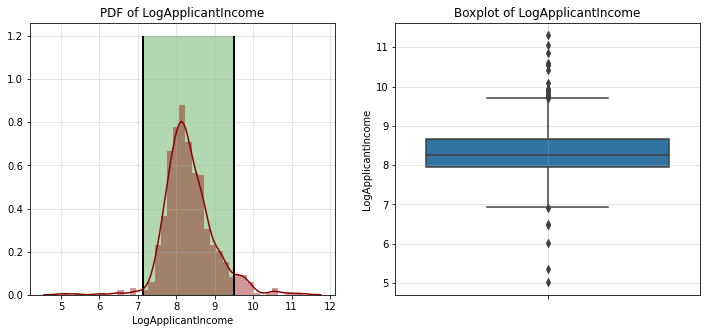

In [11]:
# outliers for 'LogApplicantIncome' based upon IQR:
outliers_iqr(num_data, 'LogApplicantIncome', 1.2)

Proportion of Outlier Data:  1.6286644951140066 %
6.407982318247033
10.275037901591155


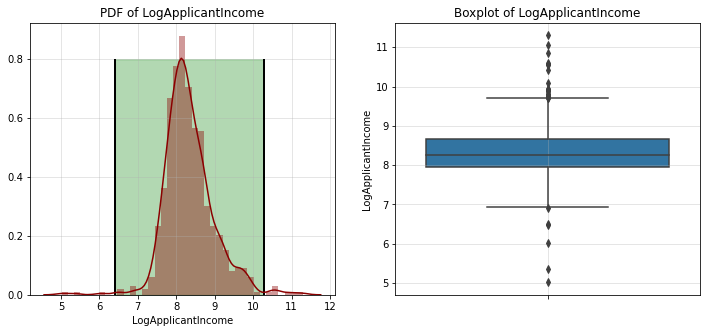

In [12]:
# outliers_data for 'LogApplicantIncome' based upon z-score:
index, right_stddev_3, left_stddev_3 = outliers_zscore(num_data, 'LogApplicantIncome', max_height=0.8)
num_data.iloc[index]
print(right_stddev_3)
print(left_stddev_3)

Proportion of Outlier Data:  1.6286644951140066 %
Count of Outliers Towards Right Tail --> 0
Count of Outliers Towards Left Tail--> 0
After Dealing with the Outliers:


,ApplicantIncome,CoapplicantIncome,LoanAmount,LogApplicantIncome,LogCoapplicantIncome,LogLoanAmount,z_scoreLogApplicantIncome
0,4583,1508.0,128.0,8.430327,7.319202,4.859812,0.137806
1,3000,0.0,66.0,8.006701,0.000000,4.204693,-0.519479
2,2583,2358.0,120.0,7.857094,7.765993,4.795791,-0.751605
3,6000,0.0,141.0,8.699681,0.000000,4.955827,0.555727
4,5417,4196.0,267.0,8.597482,8.342125,5.590987,0.397158


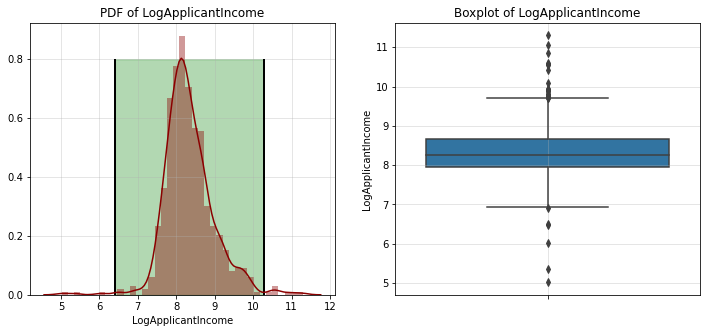

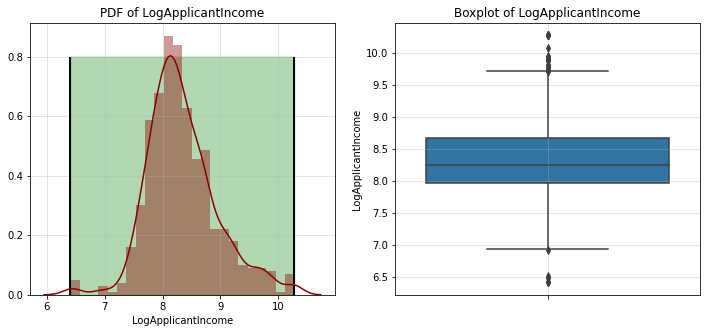

In [13]:
# winsorizin outliers based upon the 3rd Z-score Value:
upd_num_data = winsorizing_outliers_zscore(num_data, 'LogApplicantIncome', max_height=0.8)
upd_num_data.head()

<h3>Observation:</h3>
<p>
<ol>
    <li>Outliers computed using IQR doesn't seem to be that efficient since the proportion of total outliers using this techniques comes out to be 16%.</li>
    <li>Since the distribution is quite close to normal distribution, thus we use Z-Score Technique to investigate the outliers and deal with the outliers using Winsorizing.</li>
      </ol>
</p>

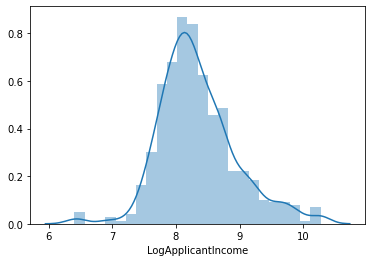

In [14]:
sns.distplot(num_data['LogApplicantIncome'])

In [15]:
orig_data['LoanAmount']

0      128.000000
1       66.000000
2      120.000000
3      141.000000
4      267.000000
          ...    
609     92.694497
610     90.696968
611    248.194910
612    207.831995
613    165.526199
Name: LoanAmount, Length: 614, dtype: float64

<h3>Outliers of "LogLoanAmount":</h3>

Numerical Inspection of LogLoanAmount:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail            95.276873
1  Percentage of Outliers Towards Right Tail            96.091205
2                            Upper Threshold             4.006299
3                            Lower Threshold             5.731293

 Graphical Interpretation of  LogLoanAmount:



True

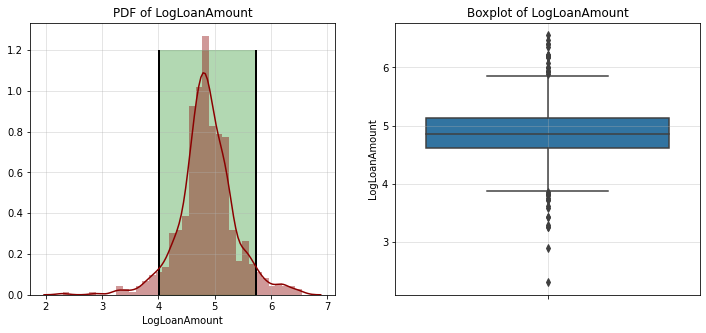

In [16]:
# outliers computed based upon the IQR:
outliers_iqr(upd_num_data, 'LogLoanAmount', 1.2)

Proportion of Outlier Data:  1.4657980456026058 %


([120, 438, 507, 551, 12, 75, 98, 433, 444],
 3.3800875646641986,
 6.3514523829189224)

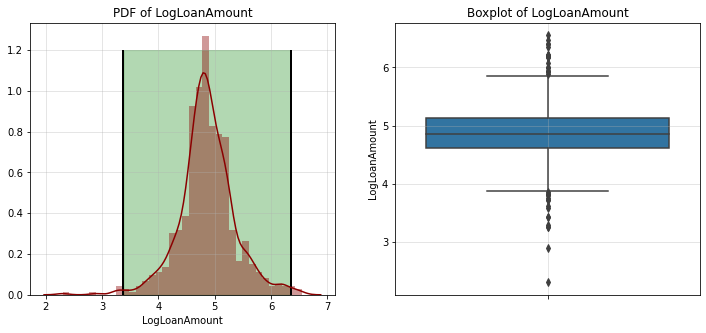

In [17]:
# outliers based upon Z-Score:
outliers_zscore(num_data, 'LogLoanAmount', max_height=1.2)

Proportion of Outlier Data:  1.4657980456026058 %
Count of Outliers Towards Right Tail --> 0
Count of Outliers Towards Left Tail--> 0
After Dealing with the Outliers:


,ApplicantIncome,CoapplicantIncome,LoanAmount,LogApplicantIncome,LogCoapplicantIncome,LogLoanAmount,z_scoreLogApplicantIncome,z_scoreLogLoanAmount
0,4583,1508.0,128.0,8.430327,7.319202,4.859812,0.137806,-0.012030
1,3000,0.0,66.0,8.006701,0.000000,4.204693,-0.519479,-1.334896
2,2583,2358.0,120.0,7.857094,7.765993,4.795791,-0.751605,-0.141308
3,6000,0.0,141.0,8.699681,0.000000,4.955827,0.555727,0.181850
4,5417,4196.0,267.0,8.597482,8.342125,5.590987,0.397158,1.464412


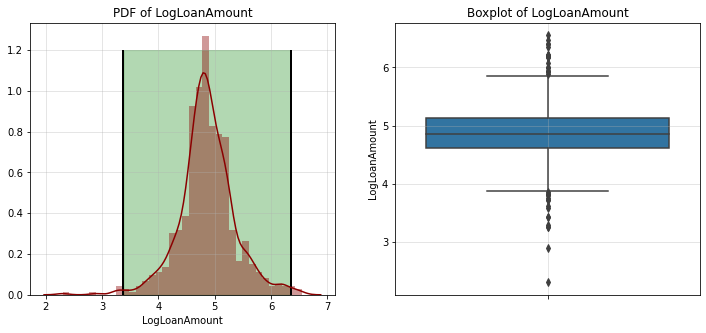

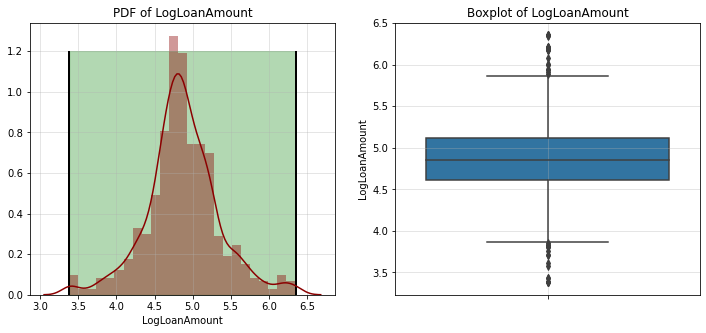

In [18]:
# dealing with the outliers of 'LogLoanAmount' using winsorizing:
upd_num_data = winsorizing_outliers_zscore(num_data, "LogLoanAmount", max_height=1.2)
upd_num_data.head()

<h3>Observation:</h3>
<p>
<ol>
    <li>Outliers computed using IQR doesn't seem to be that efficient since the proportion of total outliers using this techniques comes out to be 16%.</li>
    <li>Since the distribution is quite close to normal distribution, thus we use Z-Score Technique to investigate the outliers and deal with the outliers using Winsorizing.</li>
      </ol>
</p>

<h3>Outliers of "LogCoapplicantIncome":</h3>

Numerical Inspection of LogCoapplicantIncome:

                                    Property  Corresponding Value
0   Percentage of Outliers Towards left Tail           100.000000
1  Percentage of Outliers Towards Right Tail           100.000000
2                            Upper Threshold            -9.287876
3                            Lower Threshold            17.027773

 Graphical Interpretation of  LogCoapplicantIncome:



True

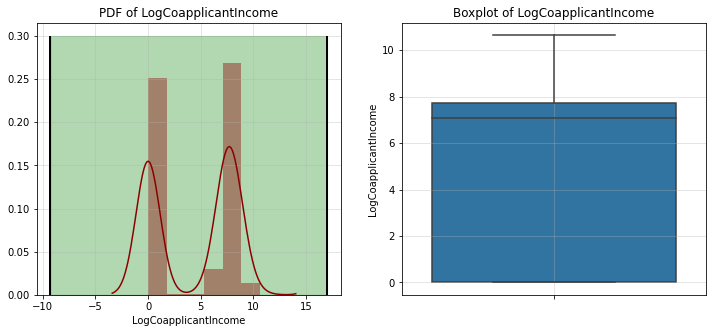

In [19]:
# outliers based upon iqr:
outliers_iqr(num_data, "LogCoapplicantIncome", max_height=0.3)

Proportion of Outlier Data:  0.0 %


([], -7.32801860056975, 15.908275683968462)

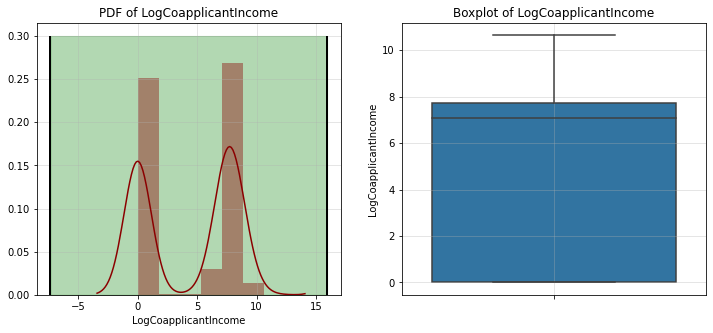

In [20]:
# outliers based upon z-score:
outliers_zscore(num_data, "LogCoapplicantIncome", max_height=0.3)

<h3>Observation:</h3>
<p>
<ol>
    <li>There seems to be no outliers in ""LogCoapplicantIncome.</li>
      </ol>
</p>

In [21]:
# data where outliers are dealt with:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LogApplicantIncome,LogCoapplicantIncome,LogLoanAmount,z_scoreLogApplicantIncome,z_scoreLogLoanAmount,z_scoreLogCoapplicantIncome
0,4583,1508.0,128.0,8.430327,7.319202,4.859812,0.137806,-0.012030,0.782158
1,3000,0.0,66.0,8.006701,0.000000,4.204693,-0.519479,-1.334896,-1.107783
2,2583,2358.0,120.0,7.857094,7.765993,4.795791,-0.751605,-0.141308,0.897526
3,6000,0.0,141.0,8.699681,0.000000,4.955827,0.555727,0.181850,-1.107783
4,5417,4196.0,267.0,8.597482,8.342125,5.590987,0.397158,1.464412,1.046293


In [22]:
for num_feat in num_feats_orig:
    num_data = num_data.drop(['z_scoreLog'+num_feat], axis=1)
    num_data[num_feat] = np.exp(num_data['Log'+num_feat])-1
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LogApplicantIncome,LogCoapplicantIncome,LogLoanAmount
0,4583.0,1508.0,128.0,8.430327,7.319202,4.859812
1,3000.0,0.0,66.0,8.006701,0.000000,4.204693
2,2583.0,2358.0,120.0,7.857094,7.765993,4.795791
3,6000.0,0.0,141.0,8.699681,0.000000,4.955827
4,5417.0,4196.0,267.0,8.597482,8.342125,5.590987


In [23]:
# adding target feature and encoding it:
num_data['target'] = orig_copy_data['Loan_Status']
num_data['target_enc'] = num_data['target'].map({'Y':1, 'N':0})
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LogApplicantIncome,LogCoapplicantIncome,LogLoanAmount,target,target_enc
0,4583.0,1508.0,128.0,8.430327,7.319202,4.859812,N,0
1,3000.0,0.0,66.0,8.006701,0.000000,4.204693,Y,1
2,2583.0,2358.0,120.0,7.857094,7.765993,4.795791,Y,1
3,6000.0,0.0,141.0,8.699681,0.000000,4.955827,Y,1
4,5417.0,4196.0,267.0,8.597482,8.342125,5.590987,Y,1


<h3>Finding Range of Data: (Used while making Prediction by the Bank Manager in Real-Time.)</h3>
<p>This is done so that the process of making predictions in real-time becomes simpler and easy since it would ensure the bank manager that the model was trained on these set of values and hence how conclusive the prediction could be.</p>

In [27]:
# deriving the maximum and minimum values for each numerical feature:
for feat in num_feats_orig:
    print("Range of {} --> {} to {}".format(feat, min(upd_num_data[feat]), max(upd_num_data[feat])))

Range of ApplicantIncome --> 150 to 81000
Range of CoapplicantIncome --> 0.0 to 41667.0
Range of LoanAmount --> 9.0 to 700.0


In [29]:
# values valid for Loan_Amount_Term:
orig_data['Loan_Amount_Term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.,  12.])

<h2>Exploratory Data Analysis:</h2>

<h4>Relationship between Target Feature and Numerical Features:</h4>

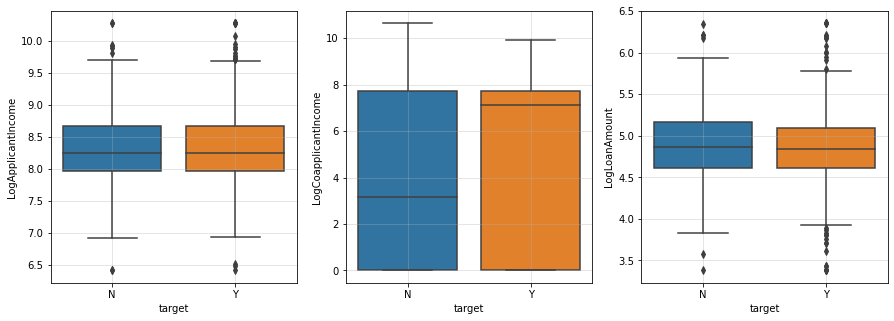

In [24]:
plt.figure(figsize=(15, 5))
k = 1
for num_feat in num_feats_orig:
    plt.subplot(1, 3, k);
    sns.boxplot(x='target', y='Log'+num_feat, data=num_data)
    plt.grid(True, alpha=0.4)
    k +=1

In [25]:
# for testing purposes:
df_LogCoapplicantIncome = num_data[num_data['target']=='Y']['LogCoapplicantIncome']
print('25th Percentile --> ',np.percentile(df_LogCoapplicantIncome, 25))
print('50th Percentile --> ',np.percentile(df_LogCoapplicantIncome, 50))
print('75th Percentile --> ',np.percentile(df_LogCoapplicantIncome, 75))

25th Percentile -->  0.0
50th Percentile -->  7.123233979416687
75th Percentile -->  7.739896817559488


<h3>Observation:</h3>
<p>
<ol>
    <li>There seems no difference between the two target classes except that of 'CoapplicantIncome'.</li>
    <li>If we perform ANOVA, then I think, Loan_Status would be significant only for 'CoapplicantIncome', since the mean of each target class seems to be different from each other.</li>
    <li><strong>Important Insight:</strong> The income of the co-applicants whose Loan has been approved seems to be higher as compared to those whose loan is not sanctioned.</li>
   </ol>
</p>

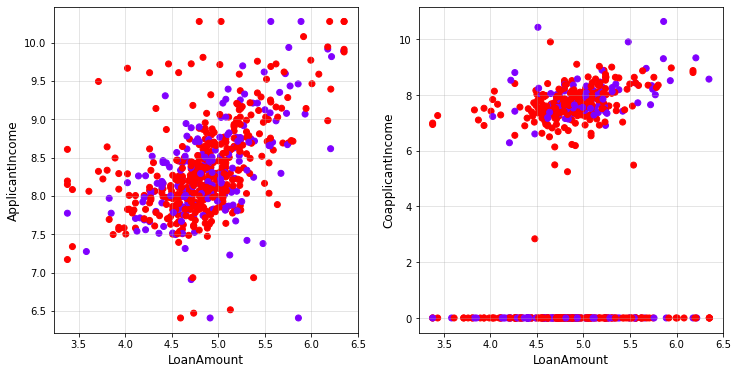

In [26]:
plt.figure(figsize=(12, 6))
k = 1
for num_feat in ['ApplicantIncome', 'CoapplicantIncome']:
    plt.subplot(1, 2, k)
    plt.scatter(num_data['LogLoanAmount'], num_data['Log'+num_feat], c=num_data['target_enc'], cmap='rainbow')
    plt.grid(True, alpha=0.4)
    plt.xlabel('LoanAmount', fontsize=12)
    plt.ylabel(num_feat, fontsize=12)
    k+=1

<li>From the above plot, we can clearly see that people whose loan has been accepted and those whose loan is not accepted almost have the same value for each of the Numerical Features. Hence, we can suspect that 'Loan_Status' or 'target' feature will not significantly explain the variance of the numerical features. (look in the feature selection method.)</li>

<h4>Relationship between Categorical Features and Target Feature:</h4>

In [27]:
# table contains the intersection probability of each possible combination of categories from the 2 cat. features:
def analysis_table(data, cat_feat, target_feat='Loan_Status'):
    
    category_prob = []
    for category in data[cat_feat].unique():
        data_category = data[data[cat_feat]==category]
        target_category_prob = []
        for target_cat in data[target_feat].unique():
            target_data_category = data_category[data_category[target_feat]==target_cat]
            target_category_prob.append((len(target_data_category)/len(data))*100)
        category_prob.append(target_category_prob)

    analysis_values = np.array(category_prob)
    target_cols = data[target_feat].unique()
    feat_cols = data[cat_feat].unique()
    table = pd.DataFrame(analysis_values, columns=[target_cols], index=[feat_cols])

    # summation along the target_columns:
    sum_along_columns = np.sum(table, axis=0).values
    df_2 = pd.DataFrame(sum_along_columns.reshape(1, 2), columns=[target_cols])
    final_table = pd.concat([table, df_2])
    final_table.index = list(table.index)+ ['Total']

    # summation along rows:
    final_table['Total'] = np.sum(final_table, axis=1)
    return final_table

# conditional probability:
def conditional_prob(data, cat_feat, target_feat='Loan_Status'):
    final_table = analysis_table(data, cat_feat)
    cols_order = data[cat_feat].unique()
    cond_prob = list((final_table.iloc[:len(cols_order), 1]/final_table.iloc[:len(cols_order), 2])*100)
    ind_prob_cat = list(final_table.iloc[:len(cols_order), 2])
    cond_prob_values = [(cols_order[idx], cond_prob[idx], ind_prob_cat[idx]) for idx in range(len(cols_order))]
    cond_prob_table = pd.DataFrame(cond_prob_values, columns=['Groups of '+cat_feat, 'Cond Prob WRT Loan Approval', 'Ind Prob Categories'])
    return cond_prob_table

# using bayes theorem to update the probability of each of the categories if Loan_Status=='Y':
def bayes_prob(data, cat_feat, target_feat='Loan_Status'):
    cond_prob_table = conditional_prob(data, cat_feat)
    cond_prob_copy_table = cond_prob_table.copy()
    cond_prob_cat= cond_prob_copy_table.iloc[:, 1]
    ind_prob_cat = cond_prob_copy_table.iloc[:, 2]

    product = cond_prob_cat.values * ind_prob_cat.values
    updated_prob = product/np.sum(product)
    cond_prob_copy_table['Updated Probability'] = updated_prob*100
    return cond_prob_copy_table
    
#   individual probability of each cat feature * conditional Probability

<h4>Insight with respect to 'Married':</h4>

In [28]:
# with respect to 'Married':
bayes_prob(orig_copy_data, 'Married')

,Groups of Married,Cond Prob WRT Loan Approval,Ind Prob Categories,Updated Probability
0,Yes,71.750000,65.14658,68.009479
1,No,63.084112,34.85342,31.990521


<h3>Interpretation of Table:</h3>
<p>
<ol>
    <li><code>Groups of cat_feat</code> contains the categories of that categorical feature.</li>
    <li><code>Cond Probability WRT Loan Approval</code> means 71.75% of the customers would be approved for loan if the customer is Married.</li>
    <li><code>Ind Prob Categories</code> contains the individual probability for all the categories of the Categorical Fetaure. Thus, 65% of the customers are married.</li>
    <li><code>Updated Probability</code> uses the Bayes Theorem to update the probability based upon a category's individual probability. Thus, we consider finally the <code>"Updated Probability"</code> for our analysis since it takes the conditional probability as well as the individual probability of that category.</li>
    <li>Thus, the most important insight is <strong>if 100 people get loan approved then 68% of them would be married.</li>
    </ol>
</p>

In [29]:
# insight table for each feature:
insight_values = []
insight_values.append(('Married', '68% of them would be married'))

<h4>Insight with respect to 'Gender':</h4>

In [30]:
# with respect to 'Gender':
bayes_prob(orig_copy_data, 'Gender')

,Groups of Gender,Cond Prob WRT Loan Approval,Ind Prob Categories,Updated Probability
0,Male,69.123506,81.758958,82.227488
1,Female,66.964286,18.241042,17.772512


<li>Insight is <strong>if 100 people get loan approved then 82% of them are Male.</li>

In [31]:
# updating the insight_values list:
insight_values.append(('Gender', '82% of them are Male.'))

<h4>Insight with respect to 'Dependents':</h4>

In [32]:
# with respect to 'Dependents':
bayes_prob(orig_copy_data, 'Dependents')

,Groups of Dependents,Cond Prob WRT Loan Approval,Ind Prob Categories,Updated Probability
0,1,64.705882,16.612378,15.639810
1,0,68.611111,58.631922,58.530806
2,2,75.247525,16.449511,18.009479
3,3+,64.705882,8.306189,7.819905


<li>Insight is <strong>if 100 people get loan approved then 60% of them have Dependents=0. Generally, it could be related as the higher the number of Dependents, the less chances are of getting the loan approved.</li>

In [33]:
# updating the insight_values list:
insight_values.append(('Dependents', '60% of them have Dependents=0. Generally, it could be related as the higher the number of Dependents, the less chances are of getting the loan approved.'))

<h4>Insight with respect to 'Education':</h4>

In [34]:
# with respect to 'Education':
bayes_prob(orig_copy_data, 'Education')

,Groups of Education,Cond Prob WRT Loan Approval,Ind Prob Categories,Updated Probability
0,Graduate,70.833333,78.175896,80.56872
1,Not Graduate,61.194030,21.824104,19.43128


<li>Insight is <strong>if 100 people get loan approved then 80% of them are Graduate.</li>

In [35]:
# updating the insight_values list:
insight_values.append(('Education', '80% of them are Graduate.'))

<h4>Insight with respect to 'Self_Employed':</h4>

In [36]:
# with respect to 'Self_Employed':
bayes_prob(orig_copy_data, 'Self_Employed')

,Groups of Self_Employed,Cond Prob WRT Loan Approval,Ind Prob Categories,Updated Probability
0,No,68.738230,86.482085,86.492891
1,Yes,68.674699,13.517915,13.507109


<li>Insight is <strong>if 100 people get loan approved then 86% of them are not Self-Employed.</li>

In [37]:
# updating the insight_values list:
insight_values.append(('Self_Employed', '86% of them are not Self-Employed.'))

<h4>Insight with respect to 'Loan_Amount_Term':</h4>

In [38]:
# with respect to 'Loan_Amount_Term':
bayes_prob(orig_copy_data, 'Loan_Amount_Term')

,Groups of Loan_Amount_Term,Cond Prob WRT Loan Approval,Ind Prob Categories,Updated Probability
0,360.0,69.771863,85.667752,86.966825
1,120.0,100.000000,0.488599,0.710900
2,180.0,65.909091,7.166124,6.872038
3,60.0,100.000000,0.325733,0.473934
4,300.0,61.538462,2.117264,1.895735
5,480.0,40.000000,2.442997,1.421801
6,240.0,75.000000,0.651466,0.710900
7,36.0,0.000000,0.325733,0.000000
8,84.0,75.000000,0.651466,0.710900
9,12.0,100.000000,0.162866,0.236967


<li>Insight is <strong>if 100 people get loan approved then 87% of them have loan_amount_term=360 months and 7% of them have loan_amount_term=180 months.</li>

In [39]:
# updating the insight_values list:
insight_values.append(('Loan_Amount_Term', '87% of them have loan_amount_term=360 months and 7% of them have loan_amount_term=180 months.'))

<h4>Insight with respect to 'Credit_History':</h4>

In [40]:
# with respect to 'Married':
bayes_prob(orig_copy_data, 'Credit_History')

,Groups of Credit_History,Cond Prob WRT Loan Approval,Ind Prob Categories,Updated Probability
0,1.0,79.047619,85.504886,98.341232
1,0.0,7.865169,14.495114,1.658768


<li>Insight is <strong>if 100 people get loan approved then 98% of them have high credit_history.</li>

In [41]:
# updating the insight_values list:
insight_values.append(('Credit_History', ' 98% of them have high credit history.'))

<h4>Insight with respect to 'Property_Area':</h4>

In [42]:
# with respect to 'Property_Area':
bayes_prob(orig_copy_data, 'Property_Area')

,Groups of Property_Area,Cond Prob WRT Loan Approval,Ind Prob Categories,Updated Probability
0,Rural,61.452514,29.153094,26.066351
1,Urban,65.841584,32.899023,31.516588
2,Semiurban,76.824034,37.947883,42.417062


<li>Insight is <strong>if 100 people get loan approved then 42% of them belong to the Semi-Urban region, 31% of them belong to the Urban region and 26% of them belong to Rural Region..</li>

In [43]:
# updating the insight_values list:
insight_values.append(('Property_Area', '42% of them belong to the Semi-Urban region, 31% of them belong to the Urban region and 26% of them belong to Rural Region.'))
insight_data = pd.DataFrame(insight_values, columns=['Categorical Feature', 'Insight(if 100 people get their loan approved then)'])

In [44]:
# data contains all of the insights with respect to the Loan_Status==1:
insight_data

,Categorical Feature,Insight(if 100 people get their loan approved then)
0,Married,68% of them would be married
1,Gender,82% of them are Male.
2,Dependents,"60% of them have Dependents=0. Generally, it c..."
3,Education,80% of them are Graduate.
4,Self_Employed,86% of them are not Self-Employed.
5,Loan_Amount_Term,87% of them have loan_amount_term=360 months a...
6,Credit_History,98% of them have high credit history.
7,Property_Area,"42% of them belong to the Semi-Urban region, 3..."


<h4>Updating the <code>orig_copy_data</code> using <code>num_data</code>:</h4>

In [45]:
# since the numerical data is preprocessed in num_data, so we copy that data to orig_copy_data: 
for num_feat in num_feats_orig:
    orig_copy_data[num_feat] = num_data[num_feat]

<h2>Feature Selection for Data Modelling:</h2>

<h3>ANOVA: Find Numerical Features whose Variance is significantly explained using <code>Loan_Status</code>:</h3>

In [46]:
from scipy.stats import f_oneway
def one_way_anova(data, cur_num_feat, categorical_feat='Loan_Status'):
    categories = list(data[categorical_feat].unique())
    anova_result = []
    
    list_data_categories = [data[data[categorical_feat]==category][cur_num_feat] for category in categories]
    p_value = f_oneway(*list_data_categories)[1]
        
    # significant feature only:
#     if p_value<0.05:
    print('ANOVA Test for '+ cur_num_feat)
    anova_result.append((categorical_feat, p_value))
        
    result_df = pd.DataFrame(anova_result, columns=['Significant Features', 'P-Values'])
    return result_df

In [47]:
# one way ANOVA for 'ApplicantIncome':
one_way_anova(orig_copy_data, 'ApplicantIncome')

ANOVA Test for ApplicantIncome


,Significant Features,P-Values
0,Loan_Status,0.945597


<li>Insight: <strong>The target feature - <code>Loan_Status</code> does not explain the variance of the numerical feature - <code>ApplicantIncome</code> as can be viewed from the above table's p-value since it is greater than 0.05.(which means that population mean of ApplicantIncome for those whose loan is accepted is the same as that of those people whose loan is not accepted.). Thus, we cannot use this feature for predicting <code>Loan_Status.</code></strong></li>

In [48]:
# one way ANOVA for 'CoapplicantIncome':
one_way_anova(orig_copy_data, 'CoapplicantIncome')

ANOVA Test for CoapplicantIncome


,Significant Features,P-Values
0,Loan_Status,0.142948


<li>Insight: <strong>The target feature - <code>Loan_Status</code> does not explain the variance of the numerical feature - <code>CoapplicantIncome</code> as can be viewed from the above table's p-value since it is greater than 0.05.(which means that population mean of CoapplicantIncome for those whose loan is accepted is the same as that of those people whose loan is not accepted.). Thus, we cannot use this feature for predicting <code>Loan_Status.</code></strong></li>

In [49]:
# one way ANOVA for 'LoanAmount':
one_way_anova(orig_copy_data, 'LoanAmount')

ANOVA Test for LoanAmount


,Significant Features,P-Values
0,Loan_Status,0.335889


<li>Insight: <strong>The target feature - <code>Loan_Status</code> does not explain the variance of the numerical feature - <code>LoanAmount</code> as can be viewed from the above table's p-value since it is greater than 0.05.(which means that population mean of LoanAmount for those whose loan is accepted is the same as that of those people whose loan is not accepted). Thus, we cannot use this feature for predicting <code>Loan_Status.</code></strong></li>

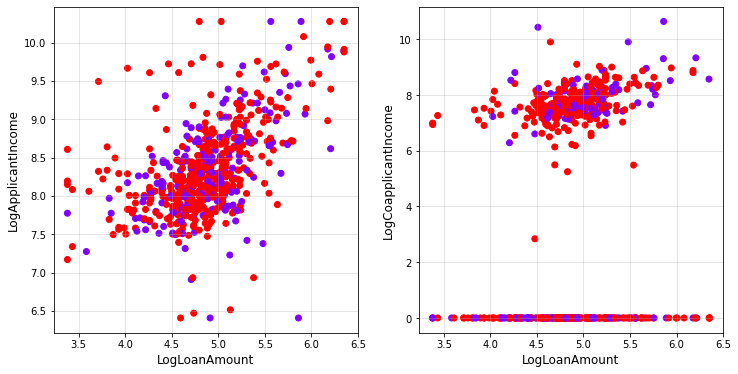

In [50]:
plt.figure(figsize=(12, 6))
k = 1
for num_feat in ['ApplicantIncome', 'CoapplicantIncome']:
    plt.subplot(1, 2, k)
    plt.scatter(num_data['LogLoanAmount'], num_data['Log'+num_feat], c=num_data['target_enc'], cmap='rainbow')
    plt.grid(True, alpha=0.4)
    plt.xlabel('LogLoanAmount', fontsize=12)
    plt.ylabel('Log'+num_feat, fontsize=12)
    k+=1

<h3>Relation between the plot and ANOVA result:</h3>
<p>
<ol>
    <li>As discussed in the previous section about how the data for both the target classes is overlapping with each other for all of the numerical features and that is why ANOVA's result is non-significant with respect to the numerical features.</li>
    <li>Hence, we might go ahead to create a new feature consisting of LoanAmount and ApplicantIncome.</li>
    </ol>
</p>

In [51]:
# Ratio of Applicant Income and Loan Amount:
num_data['CombinedNumFeat'] = (num_data['LogApplicantIncome']*num_data['LogCoapplicantIncome'])/num_data['LogLoanAmount']
orig_copy_data['CombinedNumFeat'] = num_data['CombinedNumFeat']
# one way ANOVA for 'RatioApplicantIncomeLoanAmount':
one_way_anova(num_data, 'CombinedNumFeat', categorical_feat='target')

ANOVA Test for CombinedNumFeat


,Significant Features,P-Values
0,target,0.071206


<li>Insight :<strong>Created a new feature using the existing features and this feature's p-value is also quite close to 0.05, thus, this feature could be used to model the target feature and the feature is named as <code>CombinedNumFeat</code>. For this feature, the null hypothesis seems to be rejected and hence, we can consider this feature for final prediction.</strong></li>

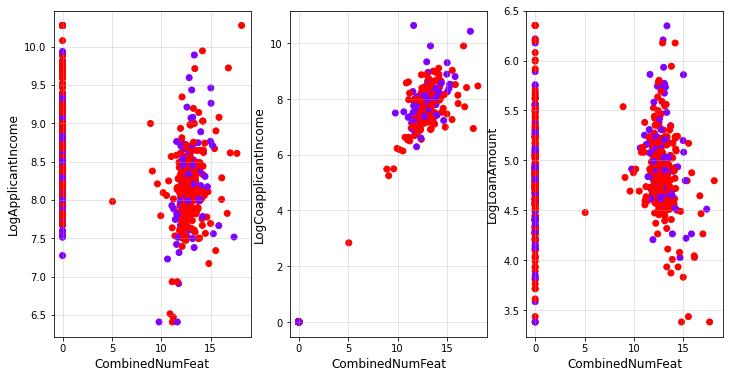

In [52]:
plt.figure(figsize=(12, 6))
k = 1
for num_feat in num_feats_orig:
    plt.subplot(1, 3, k)
    plt.scatter(num_data['CombinedNumFeat'], num_data['Log'+num_feat], c=num_data['target_enc'], cmap='rainbow')
    plt.grid(True, alpha=0.4)
    plt.xlabel('CombinedNumFeat', fontsize=12)
    plt.ylabel('Log'+num_feat, fontsize=12)
    k+=1

<h3>Chi-Square Test of Independence: Find Significant Categorical Features:</h3>

In [53]:
from scipy.stats import chi2_contingency

# creating the contingency table:
def contingency_table(data, cat_feat, target_feat='Loan_Status'):
    category_prob = []
    for category in data[cat_feat].unique():
        data_category = data[data[cat_feat]==category]
        target_category_prob = []
        for target_cat in data[target_feat].unique():
            target_data_category = data_category[data_category[target_feat]==target_cat]
            target_category_prob.append((len(target_data_category)))
        category_prob.append(target_category_prob)

    analysis_values = np.array(category_prob)
    target_cols = data[target_feat].unique()
    feat_cols = data[cat_feat].unique()
    table = pd.DataFrame(analysis_values, columns=[target_cols], index=[feat_cols])
    return table


# performing the chi-square test of independence to compute the significant categorical features for the target feature:
def chi2_test_of_indep(data, all_cat_feats, target_feat='Loan_Status'):
    results_ = []
    num_categories = data[target_feat].nunique()
    print('Chi-square Test of Independence is computed for --> ', target_feat)
    for categorical_feat in all_cat_feats:
        if categorical_feat != target_feat:
            cont_table = contingency_table(data, categorical_feat)
            p_value = chi2_contingency(cont_table)[1] # chi-square test of independence
            
            # significant features dependence:
            if p_value<=0.1:
                results_.append((categorical_feat, p_value))
                
        else:
            continue
        
    test_of_indep_df = pd.DataFrame(results_, columns=['Significant Features', 'P-Values'])
    return test_of_indep_df

In [54]:
# performing the test once for all:
chi2_test_df = chi2_test_of_indep(orig_copy_data, cat_feats_orig)
chi2_test_df

Chi-square Test of Independence is computed for -->  Loan_Status


,Significant Features,P-Values
0,Married,3.436326e-02
1,Education,4.309962e-02
2,Credit_History,3.418350e-40
3,Property_Area,2.136019e-03


In [55]:
# significant features using ANOVA and Chi-Square Test of Independece:
sig_feats = list(chi2_test_df['Significant Features'])+['CombinedNumFeat']
sig_feats

['Married', 'Education', 'Credit_History', 'Property_Area', 'CombinedNumFeat']

<h3>Encoding Data for Feature Selection:</h3>

In [199]:
def encoding_data(full_data, target_feature='Loan_Status'):
    target_y = full_data[target_feature].map({'Y':1, 'N':0})
    input_x = full_data.drop([target_feature], axis=1)
    
    # iterating over each 
    for each_feat in list(input_x.columns):
        if full_data[each_feat].nunique() >= 10:
            # a numerical feature:
            print(each_feat)
            input_x[each_feat] = np.log(input_x[each_feat]+1) # log transformation will scale all of the values
            
        else:
            # a categorical feature:
            if (full_data[each_feat].nunique()==2):
                # binary categorical feature
                categories = list(input_x[each_feat].unique())
                input_x[each_feat] = input_x[each_feat].map({categories[0]:0, categories[1]:1})
            else:
               # multinomial categorical feature 
                for category in input_x[each_feat].unique(): # iterate over each category of the multi. categorical feature:
                    input_x[each_feat + '_' + category] = np.where(input_x[each_feat]==category, 1, 0)

                # removing the categorical feature once encoded:
                input_x = input_x.drop([each_feat], axis=1)
    
    return input_x, target_y 

In [200]:
# getting the encoded data:
x_encoded, y_target = encoding_data(orig_copy_data)
x_encoded.head()

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
CombinedNumFeat


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,CombinedNumFeat,Dependents_1,Dependents_0,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Urban,Property_Area_Semiurban
0,0,0,0,0,8.430327,7.319202,4.859812,5.888878,0,2.617150,1,0,0,0,1,0,0
1,0,0,0,1,8.006701,0.000000,4.204693,5.888878,0,0.000000,0,1,0,0,0,1,0
2,0,0,1,0,7.857094,7.765993,4.795791,5.888878,0,2.619093,0,1,0,0,0,1,0
3,0,1,0,0,8.699681,0.000000,4.955827,5.888878,0,0.000000,0,1,0,0,0,1,0
4,0,0,0,1,8.597482,8.342125,5.590987,5.888878,0,2.626697,0,0,1,0,0,1,0


<h3>Other Feature Selection Techniques:</h3>

<h4> 1) F_Classification imported from Sklearn which uses ANOVA to find the significant features:</h4>

In [58]:
from sklearn.feature_selection import f_classif

In [59]:
# Performing ANOVA on the whole input data:
inp_feats = list(x_encoded.columns)
f_val, p_val = f_classif(x_encoded, y_target)

['Married',
 'Education',
 'Credit_History',
 'CombinedNumFeat',
 'Property_Area_Rural',
 'Property_Area_Semiurban']

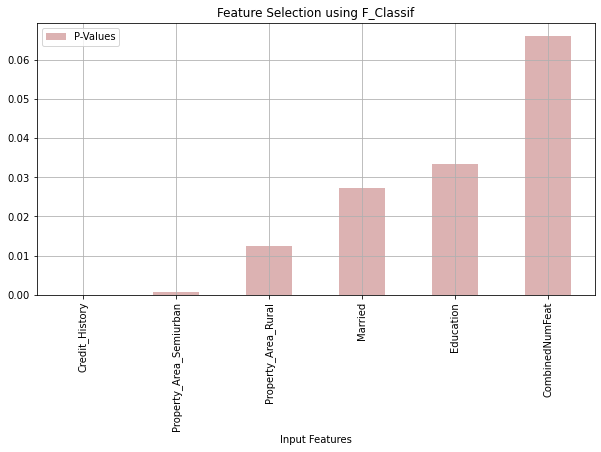

In [60]:
def plot_significant_features(feats_x, val_y, title, threshold=0.05):
    result = []
    for idx in range(len(feats_x)):
        if val_y[idx] < threshold:
            result.append((feats_x[idx], val_y[idx]))
        else:
            continue
    
    result_df = pd.DataFrame(result, columns=['Input Features', 'P-Values'])
    result_df.sort_values(by='P-Values').plot('Input Features', 'P-Values', kind='bar', 
                  figsize=(10, 5), grid=True, alpha=0.3, color='darkred', title=title)
    
    return list(result_df['Input Features'])
        
f_classif_sig_feats = plot_significant_features(inp_feats, p_val, title='Feature Selection using F_Classif', threshold=0.1)
f_classif_sig_feats

<h4>2) Chi-sqaure Test of Independence from Sklearn:</h4>

In [61]:
from sklearn.feature_selection import chi2

['Married',
 'Education',
 'CoapplicantIncome',
 'Credit_History',
 'CombinedNumFeat',
 'Property_Area_Rural',
 'Property_Area_Semiurban']

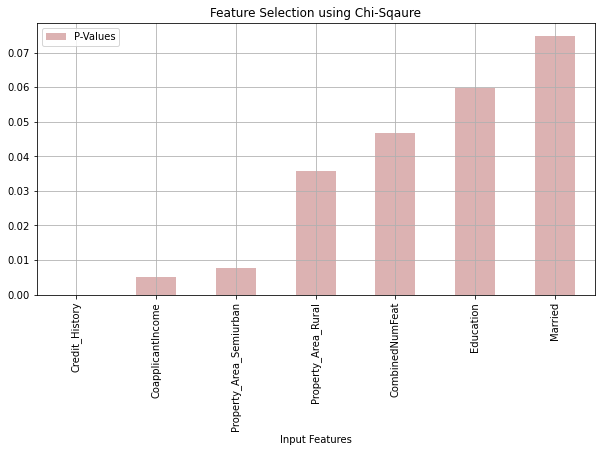

In [62]:
# performing chi-square test of independence:
chi2_val, p_val = chi2(x_encoded, y_target)
chi2_sig_feats = plot_significant_features(inp_feats, p_val, title='Feature Selection using Chi-Sqaure', threshold=0.1)
chi2_sig_feats

<h4>3) Feature Selection using Mutual Information:</h4>

In [63]:
from sklearn.feature_selection import mutual_info_classif

In [64]:
# making a bit of changes:
def new_plot_significant_features(feats_x, val_y, title, threshold=0.05):
    result = []
    for idx in range(len(feats_x)):
        if val_y[idx] > threshold:
            result.append((feats_x[idx], val_y[idx]))
        else:
            continue
    
    result_df = pd.DataFrame(result, columns=['Input Features', 'P-Values'])
    result_df.sort_values(by='P-Values').plot('Input Features', 'P-Values', kind='bar', 
                  figsize=(10, 5), grid=True, alpha=0.3, color='darkred', title=title)
    
    return list(result_df['Input Features'])

['Married',
 'Self_Employed',
 'CoapplicantIncome',
 'Loan_Amount_Term',
 'Credit_History',
 'Dependents_0',
 'Property_Area_Rural']

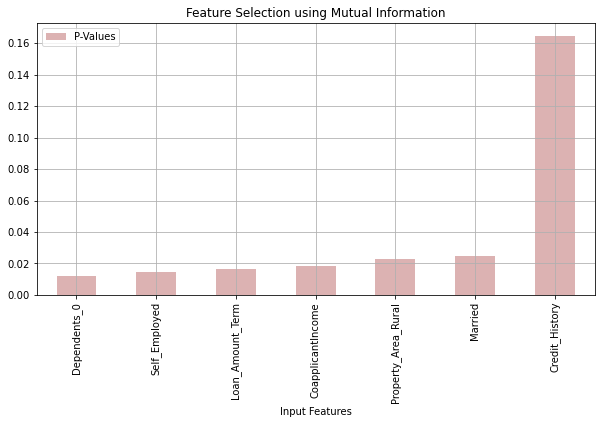

In [65]:
mi_val = mutual_info_classif(x_encoded, y_target)
mi_sig_feats = new_plot_significant_features(inp_feats, mi_val, title='Feature Selection using Mutual Information', threshold=0.009)
mi_sig_feats

<h3>Union of all Significant Features:</h3>

In [66]:
sig_feats

['Married', 'Education', 'Credit_History', 'Property_Area', 'CombinedNumFeat']

In [128]:
final_sig_feats = list(set(f_classif_sig_feats).union(set(chi2_sig_feats)).union(set(mi_sig_feats)))
final_sig_feats.append('ApplicantIncome')
final_sig_feats

['CoapplicantIncome',
 'Credit_History',
 'Education',
 'Loan_Amount_Term',
 'Married',
 'Dependents_0',
 'Property_Area_Semiurban',
 'Self_Employed',
 'CombinedNumFeat',
 'Property_Area_Rural',
 'ApplicantIncome']

In [129]:
x_encoded[final_sig_feats].corr()['CombinedNumFeat']

CoapplicantIncome          0.994259
Credit_History            -0.013191
Education                  0.055973
Loan_Amount_Term           0.014650
Married                   -0.330813
Dependents_0              -0.029693
Property_Area_Semiurban   -0.016924
Self_Employed             -0.103012
CombinedNumFeat            1.000000
Property_Area_Rural        0.053902
ApplicantIncome           -0.371678
Name: CombinedNumFeat, dtype: float64

<li>Insight: <strong><code>CoApplicantIncome</code> is highly correlated with <code>CombinedNumFeat</code> and thus, I need to drop <code>CoApplicantIncome</code> else the problem of Multicollinearity would exist.</strong></li>

In [130]:
# removing 'CoapplicantIncome':
final_sig_feats.remove('CoapplicantIncome')
final_sig_feats

['Credit_History',
 'Education',
 'Loan_Amount_Term',
 'Married',
 'Dependents_0',
 'Property_Area_Semiurban',
 'Self_Employed',
 'CombinedNumFeat',
 'Property_Area_Rural',
 'ApplicantIncome']

In [131]:
# features which were proved to be insignificant:
set(inp_feats).symmetric_difference(set(final_sig_feats))

{'CoapplicantIncome',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Gender',
 'LoanAmount',
 'Property_Area_Urban'}

In [132]:
final_sig_feats

['Credit_History',
 'Education',
 'Loan_Amount_Term',
 'Married',
 'Dependents_0',
 'Property_Area_Semiurban',
 'Self_Employed',
 'CombinedNumFeat',
 'Property_Area_Rural',
 'ApplicantIncome']

In [133]:
orig_copy_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'CombinedNumFeat'],
      dtype='object')

In [73]:
# Important Features which we need:
# Dependents, Property-Area, CombinedNumFeat(CoapplicantIncome, ApplicantIncome, LoanAmount are used to compute), ApplicantIncome, Education, Married, Credit_History, 

<li>Insight: <strong><code>CoApplicantIncome</code>, <code>ApplicantIncome</code> and <code>LoanAmount</code> have been used in creating <code>CombinedNumFeat</code>. Further, rest of the features which have been proved insignificant i.e. do not seem to be that important as well.</strong></li>

<h3>Model Building:</h3>
<p>We would be training 5 different Machine Learning Classification Models along with its hyperparameter tuning. After training each of the models, we would be evaluating them on some set of validation data. Thus, the best model would be chosen in such a manner i.e. the model which would be performing the best for Validation Data. The 5 training algorithms which would be used are: 
<ul>
    <li>Logistic Regression</li>
    <li>Decision Trees Classifier</li>
    <li>Random Forest Classifier</li>
    <li>Support Vector Classifier</li>
    <li>Voting Classifier (Ensemble of above Classifier)</li>
    </ul>
</p>

N --> 31.27035830618892 %
Y --> 68.72964169381108 %


Text(0.5, 1.0, 'Target Classes of Whole Data')

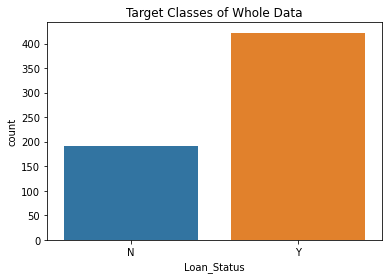

In [134]:
# countplot for target feature for the whole data:
for category in orig_copy_data['Loan_Status'].unique():
    print(category, '-->', len(orig_copy_data[orig_copy_data['Loan_Status']==category])/len(orig_copy_data)*100, '%')
sns.countplot('Loan_Status', data=orig_copy_data)
plt.title('Target Classes of Whole Data')

<li>Since the classes seem to be imbalanced, hence we need to first Oversample data and then we would apply Machine Learning Classifiers to classify the data.</li>

<h3>Over Sampling Data using SMOTE(Synthetic Minority Oversampling TEchnique):</h3>

In [135]:
# Most of the features are categorical in nature i.e. having Nominal Level of Measurement, hence
# we would be using 'SMOTENC' i.i Synthetic Minority Oversampling TEchnique for Nominal and Continous Data.

from imblearn.over_sampling import SMOTENC
final_train_data = x_encoded[final_sig_feats]

# computing the index of categorical features since it needs to be passed as an argument:
all_feats = list(final_train_data.columns)
idx_all_feats = list(range(0, len(all_feats)))

# Removing Index of Numerical Features:
idx_num_feat = all_feats.index('CombinedNumFeat')
idx_all_feats.remove(idx_num_feat)

idx_num_feat_2 = all_feats.index('ApplicantIncome')
idx_all_feats.remove(idx_num_feat_2)

idx_cat_feat = idx_all_feats
print('Index of Categorical Features --> ', idx_cat_feat)

Index of Categorical Features -->  [0, 1, 2, 3, 4, 5, 6, 8]


In [136]:
sm = SMOTENC(random_state=42, categorical_features=idx_cat_feat)
x_final_res, y_final_res = sm.fit_resample(final_train_data, y_target)
print('Resampling has been done')

Resampling has been done


In [137]:
# Printing Result of Over-Sampling:
print('Before Over-Sampling:')
print('Shape of Training Data: {}'.format(final_train_data.shape))
print('Shape of Target Data: {}'.format(y_target.shape))
print('Number of Class-0 labels: {} and Class-1 labels: {}'.format(len(y_target[y_target==0]), len(y_target[y_target==1])))

print('===========================================')
print('After Over-Sampling:')
print('Shape of Training Data: {}'.format(x_final_res.shape))
print('Shape of Target Data: {}'.format(y_final_res.shape))
print('Number of Class-0 labels: {} and Class-1 labels: {}'.format(len(y_final_res[y_final_res==0]), len(y_final_res[y_final_res==1])))

Before Over-Sampling:
Shape of Training Data: (614, 10)
Shape of Target Data: (614,)
Number of Class-0 labels: 192 and Class-1 labels: 422
After Over-Sampling:
Shape of Training Data: (844, 10)
Shape of Target Data: (844,)
Number of Class-0 labels: 422 and Class-1 labels: 422


Text(0.5, 1.0, 'Count Plot after Over-Sampling Data')

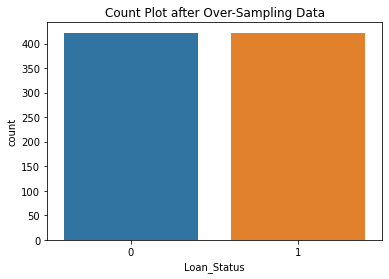

In [138]:
# Countplot of Target Feature of the full data:
sns.countplot(y_final_res)
plt.title('Count Plot after Over-Sampling Data')

<h3>Creating Training and Validation Data using Stratified Sampling:</h3>
<p>Since, now we have equal number of instances for both the classes, thus we should be focussing on Stratified Sampling of Training and Validation Data.</p>

In [139]:
# creating a function which returns Stratified Sampled Data for training and Validation:
def stratified_sampling_train_val(prop_train_data, full_data, target_feat_data):
    """We know that the target class is binary and the number of instances for both the class are equal, hence perform stratified Sampling"""
    
    full_data['target'] = target_feat_data
    class_0_data = full_data[full_data['target']==0]
    class_1_data = full_data[full_data['target']==1]
    
    total_train_idx = int(prop_train_data*len(full_data)) # total count of train data:
    class_idx = total_train_idx//2 # since we want equal data from both the classes:
    
    # creating train data:
    train_0_data = class_0_data[:class_idx]
    train_1_data = class_1_data[:class_idx]
    full_train_data = pd.concat([train_0_data, train_1_data], axis=0).sample(frac=1) # shuffling the data as well
    train_target = full_train_data['target'] 
    train_data = full_train_data.drop(['target'], axis=1)
    
    # creating val data:
    val_0_data = class_0_data[class_idx:]
    val_1_data = class_1_data[class_idx:]
    full_val_data = pd.concat([val_0_data, val_1_data], axis=0).sample(frac=1) # shuffling the data as well
    val_target = full_val_data['target']
    val_data = full_val_data.drop(['target'], axis=1)
    
    return (train_data, train_target, val_data, val_target)

In [140]:
# Creating Copy of Data:
x_final_res_copy = x_final_res.copy()
y_final_res_copy = y_final_res.copy()

# training and validation data with training data to be 90% of the total data:
x_train, y_train, x_val, y_val = stratified_sampling_train_val(0.90, x_final_res_copy, y_final_res_copy)

In [141]:
# Shapes of Training and Validation Data:
print('Training Data:')
print('Shape of x_train: {}'.format(x_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))

print('==========================================')

print('Validation Data:')
print('Shape of x_val: {}'.format(x_val.shape))
print('Shape of y_val: {}'.format(y_val.shape))

Training Data:
Shape of x_train: (758, 10)
Shape of y_train: (758,)
Validation Data:
Shape of x_val: (86, 10)
Shape of y_val: (86,)


Text(0.5, 1.0, 'Target Class for Training Data')

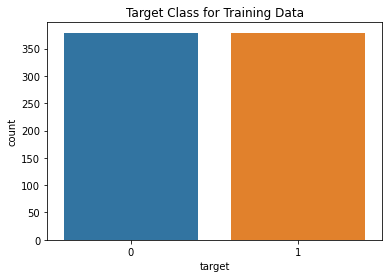

In [142]:
# compostition of both the classes of Target Feature in Training Data: 
sns.countplot(y_train)
plt.title('Target Class for Training Data')

Text(0.5, 1.0, 'Target Class for Validation Data')

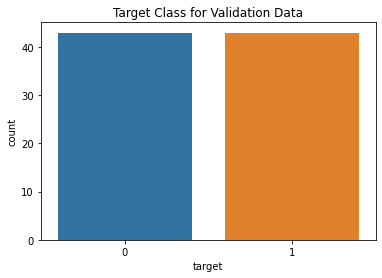

In [143]:
# compostition of both the classes of Target Feature in Validation Data: 
sns.countplot(y_val)
plt.title('Target Class for Validation Data')

<h3>Model Evaluation:</h3>

In [144]:
# globally initializing variables for storing relevant data:
models = []
precisions = []
recalls = []
fprs = []
tprs = []
training_errors = []
validation_errors = []
auc_scores = []

In [145]:
# evaluation cell:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, log_loss, confusion_matrix

# plot representing overfitting of the model and how it learns with each new data added:
def learning_overfitting_curves(model, train_data, train_target, val_data, val_target):
    training_error = [] # stores the training error of each step:
    validation_error = [] # stores the validation error of each step:
    for step in range(10, len(train_data)):
        
        # increasing the training data by 1 at each step:
        model.fit(train_data[:step], train_target[:step])
        
        # predictions on training and validation data:
        train_pred = model.predict(train_data[:step])
        val_pred = model.predict(val_data)
        
        # current training and validation error:
        cur_train_error = log_loss(train_target[:step], train_pred)
        cur_val_error = log_loss(val_target, val_pred)
        
        # adding it to list:
        training_error.append(cur_train_error)
        validation_error.append(cur_val_error)
        
    return (training_error, validation_error)
    
# plotting Precision-Recall-Curve and ROC Curve:
def evaluation_plots(model, train_target, train_pred, val_pred_proba, val_target, val_pred,  title, save, learning_curves):
    global models
    global precisions
    global recalls
    global fprs
    global tprs
    global training_errors
    global validation_errors
    global auc_scores
    
    prec_, recall_, threshold_ = precision_recall_curve(val_target, val_pred_proba)
    fpr_, tpr_, thresh_ = roc_curve(val_target, val_pred_proba)
    training_error, validation_error = learning_overfitting_curves(model, x_train, train_target, x_val, val_pred)
    cur_auc_score = roc_auc_score(val_target, val_pred)
    
    if (save==False):
        # plotting Precision Recall Curve::
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
        ax1.plot(prec_, recall_, 'b-o', label=title)
        ax1.set_xlabel('Precision', fontsize=12)
        ax1.set_ylabel('Recall', fontsize=12)
        ax1.set_title('Precision-Recall-Curve', fontsize=15)
        ax1.grid(True, alpha=0.4)
        ax1.legend()

        # plotting ROC Curve:
        ax2.plot(fpr_, tpr_, label=title)
        ax2.set_xlabel('False Positive Rate', fontsize=12)
        ax2.set_ylabel('True Positive Rate', fontsize=12)
        ax2.set_title('ROC Curve', fontsize=15)
        ax2.grid(True, alpha=0.4)
        ax2.text(0.3, 0.1, 'ROC Score --> '+ str(cur_auc_score), fontsize=10, bbox=dict(facecolor='blue', alpha=0.1))
        ax2.legend()

        # plotting learning curves:
        ax3.plot(np.arange(len(training_error)), training_error, 'b-o', label='Training Error')
        ax3.plot(np.arange(len(validation_error)), validation_error, 'r-o',  label='Validation Error')
        ax3.set_xlabel('Number of Steps', fontsize=12)
        ax3.set_ylabel('Log Loss', fontsize=12)
        ax3.set_title('Learning Curves', fontsize=15)
        ax3.grid(True, alpha=0.4)
        ax3.legend()
    
    else:        
        # saving the data to the globally assigned lists:
        models.append(title)
        precisions.append(tuple(prec_))
        recalls.append(tuple(recall_))
        fprs.append(tuple(fpr_))
        tprs.append(tuple(tpr_))
        training_errors.append(tuple(training_error))
        validation_errors.append(tuple(validation_error))
        auc_scores.append(cur_auc_score)
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
        
        # plotting Precision Recall Curve::
        for idx in range(len(models)):
            ax1.plot(precisions[idx], recalls[idx], label=models[idx])
        
        ax1.set_xlabel('Precision', fontsize=12)
        ax1.set_ylabel('Recall', fontsize=12)
        ax1.set_title('Precision-Recall-Curve', fontsize=15)
        ax1.grid(True, alpha=0.4)
        ax1.legend()

        # plotting ROC Curve:
        for idx in range(len(models)):
            ax2.plot(fprs[idx], tprs[idx], label=models[idx])
        
        ax2.set_xlabel('False Positive Rate', fontsize=12)
        ax2.set_ylabel('True Positive Rate', fontsize=12)
        ax2.set_title('ROC Curve', fontsize=15)
        ax2.grid(True, alpha=0.4)
        ax2.legend()
        
        # plotting roc-auc bar chart:
        ax3.bar(models, auc_scores, color='orange')
        ax3.set_xlabel('Classification Algo', fontsize=12)
        ax3.set_ylabel('AUC Score', fontsize=12)
        ax3.set_title('AUC Bar Chart', fontsize=15)
        ax3.grid(True, alpha=0.4)
        
    if learning_curves:
        plt.figure(figsize=(20, 10))
        k = 1
        for idx in range(len(models)):
            plt.subplot(1, len(models), k)
            plt.plot(np.arange(len(training_errors[idx])), training_errors[idx], 'b--', label='Train Error')
            plt.plot(np.arange(len(validation_errors[idx])), validation_errors[idx], 'r--',  label='Val Error')
            plt.xlabel('Number of Steps', fontsize=10)
            plt.ylabel('Log Loss', fontsize=10)
            plt.title(models[idx], fontsize=12)
            plt.grid(True, alpha=0.4)
            plt.legend()
            k +=1


# evaluation table returns the table comparision between the training and validation metrics:  
def evaluation_table(y_train, y_train_pred, y_val, y_val_pred):
    # training performance metrics:
    accuracy_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_train = roc_auc_score(y_train, y_train_pred)
    train_perf = [accuracy_train, prec_train, recall_train, f1_train, roc_train]
    
    # validation performance metrics:
    accuracy_val = accuracy_score(y_val, y_val_pred)
    prec_val = precision_score(y_val, y_val_pred)
    recall_val = recall_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)
    roc_val = roc_auc_score(y_val, y_val_pred)
    val_perf = [accuracy_val, prec_val, recall_val, f1_val, roc_val]
    
    # forming a table:
    result = []
    for train_p, val_p in zip(train_perf, val_perf):
        result.append((train_p, val_p))
        
    result_table = pd.DataFrame(result, columns=['Training Metrics', 'Validation Metrics'], index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC Score'])
    return result_table

# combining the above functions:
def evaluating_model(best_model, title, save=False, learning_curves=False):
    
    # predicting probabilities of validation data:
    y_val_pred_proba = np.array(best_model.predict_proba(x_val))[:, 1]
    
    # predicting output:
    y_train_pred = best_model.predict(x_train)
    y_val_pred = best_model.predict(x_val)

    # printing the Evaluation Table:
    eval_result_table = evaluation_table(y_train, y_train_pred, y_val, y_val_pred)
    print('Evaluation Table for '+title)
    print(eval_result_table)
    
    # plotting the ROC and Precision-Recall-Curve:
    evaluation_plots(best_model, y_train, y_train_pred, y_val_pred_proba, y_val, y_val_pred, title, save, learning_curves)
    return True


<h3>1) Logistic Regression:</h3>
<p> Hyper-Parameters to control: 
<ol>
    <li>Regularization Parameter - <code>C</code></li>
    </ol>
</p>

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [147]:
# defining a function which returns the best model:
def search_best_model(estimator, params, search='grid'):
    f1_scorer = make_scorer(accuracy_score) # making the roc_auc_score as the scoring function
    if search == 'random':
        rand_cv = RandomizedSearchCV(estimator, param_distributions=params, scoring=f1_scorer, cv=5, n_jobs=-1)
        rand_cv_search = rand_cv.fit(x_train, y_train)
        best_model_rand = rand_cv_search.best_estimator_
        return best_model_rand
    else:
        grid_cv = GridSearchCV(estimator, param_grid=params, scoring=f1_scorer, cv=5, n_jobs=-1)
        grid_cv_search = grid_cv.fit(x_train, y_train)
        best_model_grid = grid_cv_search.best_estimator_
        return best_model_grid

In [148]:
# training various Logistic Regression Models:
log_reg = LogisticRegression(random_state=42)
# First Search:
# values_c = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}
# best_model_1 = search_best_model(log_reg, values_c)

# Second Search:
values_c = {'C':[0.01, 0.02, 0.025, 0.03]}
best_model_1 = search_best_model(log_reg, values_c)

best_model_1

LogisticRegression(C=0.03, random_state=42)

Evaluation Table for Logistic Regression
           Training Metrics  Validation Metrics
Accuracy           0.717678            0.732558
Precision          0.694118            0.717391
Recall             0.778364            0.767442
F1-Score           0.733831            0.741573
AUC Score          0.717678            0.732558


True

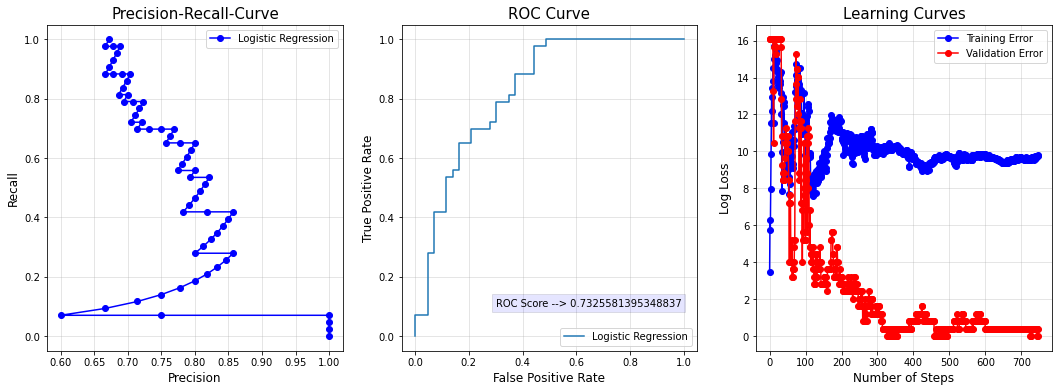

In [149]:
# evaluating the best Logistic Regression Model:
evaluating_model(best_model_1, 'Logistic Regression')

Evaluation Table for Log Reg
           Training Metrics  Validation Metrics
Accuracy           0.716359            0.732558
Precision          0.692488            0.717391
Recall             0.778364            0.767442
F1-Score           0.732919            0.741573
AUC Score          0.716359            0.732558


True

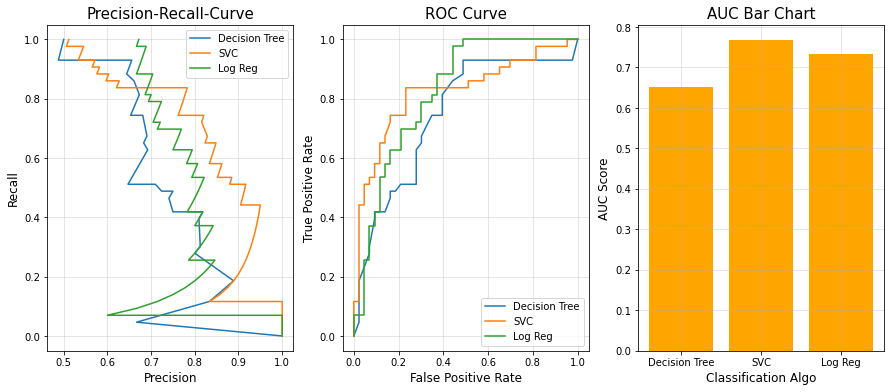

In [167]:
# saving the best Logistic Regression Model:
evaluating_model(best_model_1, 'Log Reg', save=True)

<h3>Decision Tress Classifier:</h3>
<p>Hyperparameters to control:
<ol>
    <li><code>criterion</code> - Keep it default i.e. <code>gini</code></li>
    <li><code>max_depth</code> - Maximum Depth of the tree.</li>
    <li><code>min_samples_split</code> - Minimum number of samples required to split the internal node.</li>
    <li><code>min_samples_leaf</code> - Minimum number of samples required to be present at the leaf node.</li>
    <li><code>max_features</code> - Maximum number of features considered during the best feature for splitting the data.</li>
    <li><code>max_leaf_nodes</code> - Maximum number of leaf nodes to be present</li>
    <li><code>class_weight</code> - Keep it <code>'balanced'</code>.</li>
    <li><code>sklearn.tree.plot_tree(dec_clf)</code> - Used to plot the tree's logic about how the tree is constructed.</li>
     </ol>
</p>

In [150]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
dec_tree_clf = DecisionTreeClassifier(random_state=42)
# First Grid Search:
# params = {'max_depth': [5, 10, 15, 20],
#          'min_samples_split': [5, 10, 15, 20],
#          'min_samples_leaf': [5, 10, 15, 20],
#          'max_features': [5, 10, 15, 20],
#          'max_leaf_nodes': [5, 10, 15, 20]}

# 2nd Grid Search:
# params = {'max_depth': [9, 10, 11],
#          'min_samples_split': [20, 30, 40, 50],
#          'min_samples_leaf': [3, 5, 7, 9],
#          'max_features': [4, 5, 6],
#          'max_leaf_nodes': [20, 30, 40, 50]}

# 3rd Grid Search:
params = {'max_depth': [10, 11, 12, 13, 14],
         'min_samples_split': [16, 18, 20, 22, 24],
         'min_samples_leaf': [5, 6],
         'max_features': [5],
         'max_leaf_nodes': [25, 28, 30, 35]}

dec_tree_best = search_best_model(dec_tree_clf, params)
dec_tree_best

DecisionTreeClassifier(max_depth=11, max_features=5, max_leaf_nodes=35,
                       min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

Evaluation Table for Decision Tree
           Training Metrics  Validation Metrics
Accuracy           0.817942            0.651163
Precision          0.830137            0.709677
Recall             0.799472            0.511628
F1-Score           0.814516            0.594595
AUC Score          0.817942            0.651163


True

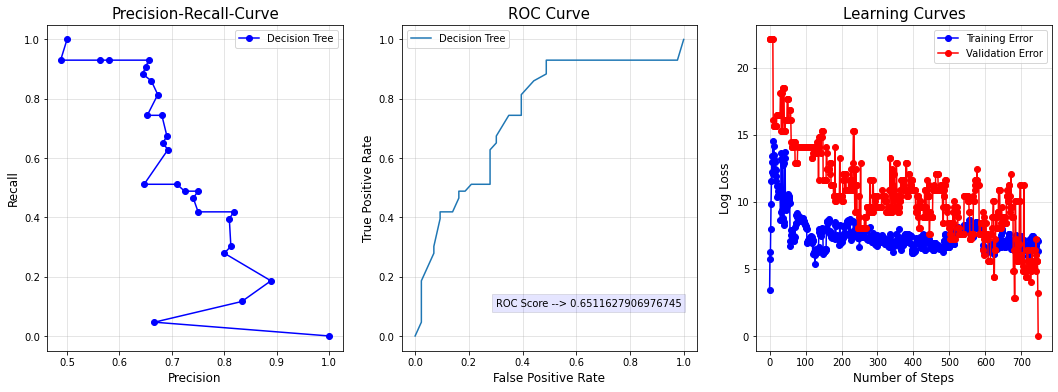

In [156]:
# evaluating best dec tree model:
evaluating_model(dec_tree_best, 'Decision Tree')

Evaluation Table for Decision Tree
           Training Metrics  Validation Metrics
Accuracy           0.817942            0.651163
Precision          0.830137            0.709677
Recall             0.799472            0.511628
F1-Score           0.814516            0.594595
AUC Score          0.817942            0.651163


True

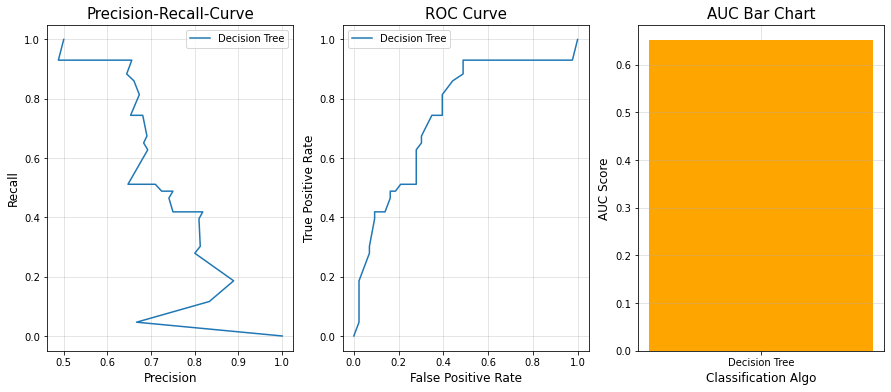

In [157]:
# saving best dec tree model:
evaluating_model(dec_tree_best, 'Decision Tree', save=True)

<h3>Support Vector Classifier:</h3>
<p>Hyperparameters to control:
<ol>
    <li><code>C</code>: This is the regularization parameter i.e. if 'C' is large, then regularization is less and vice versa.</li>
    <li><code>kernel</code>: The kernel or mapping function which is used to transform the original data to new space in order to find the linear decision boundary in that new space.</li>
    <li><code>gamma</code>: This is specifically used in 'rbf' kernel where gamma=1/(2*(variance)). Thus, if gamma is high, variance or standard deviation of the Gaussian Function is less and vice versa. Th gaussian function is used to describe extent of each data point while converting it to the new space. </li>
    <li><code>probability</code>: Keep it True.</li>
   </ol>
</p>

In [158]:
from sklearn.svm import SVC

In [164]:
# 1st Grid Search:
svc_clf = SVC(probability=True, kernel='rbf')

# 1st Grid Search:
# params = {'C': [0.001, 0.01, 0.1, 1, 100],
#          'gamma': [0.001, 0.01, 0.1, 1, 100]}

# 2nd Grid Search:
# params = {'C': [100, 300, 900, 1200, 1500, 3000, 5000],
#          'gamma': [0.3, 0.9, 1, 1.5, 2, 3, 5, 20, 50, 80, 90]}

# # 3rd Grid Search:
params = {'C': [1065, 1070, 1075, 1090, 1095, 1100],
         'gamma': [0.8, 0.9, 1]}

best_svc_clf = search_best_model(svc_clf, params)
best_svc_clf

SVC(C=1090, gamma=0.8, probability=True)

Evaluation Table for SVC
           Training Metrics  Validation Metrics
Accuracy           0.919525            0.767442
Precision          0.944134            0.780488
Recall             0.891821            0.744186
F1-Score           0.917232            0.761905
AUC Score          0.919525            0.767442


True

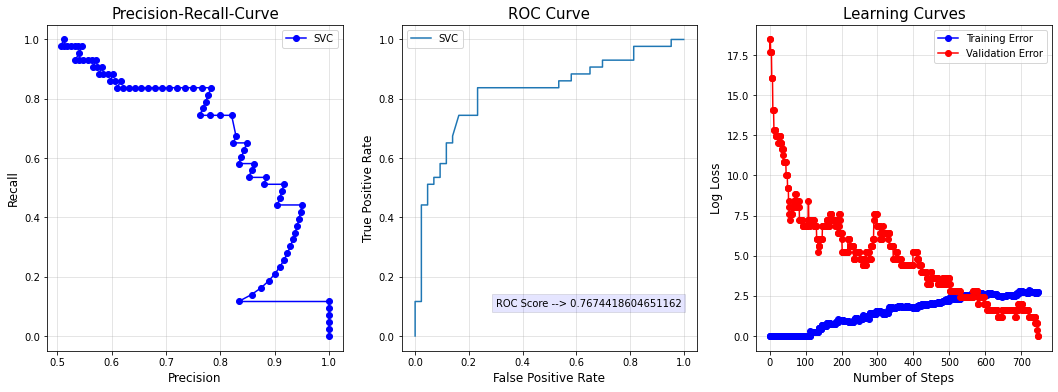

In [165]:
# saving the Support Vector Classifer:
evaluating_model(best_svc_clf, 'SVC')

Evaluation Table for SVC
           Training Metrics  Validation Metrics
Accuracy           0.920844            0.767442
Precision          0.944290            0.780488
Recall             0.894459            0.744186
F1-Score           0.918699            0.761905
AUC Score          0.920844            0.767442


True

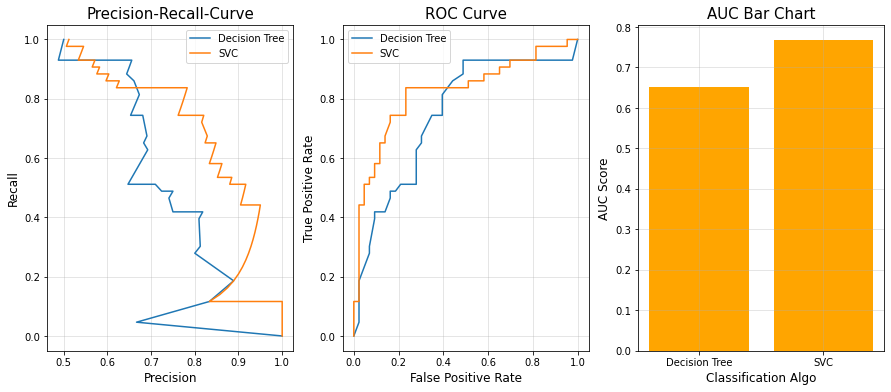

In [166]:
# evaluating Support Vector Classifer:
evaluating_model(best_svc_clf, 'SVC', save=True)

<h3>Random Forest Classifier:</h3>
<p>Hyperparameters to control:
<ol>
    <li><code>n_estimators:</code>Number of Decision Trees to train. It also resembles the number of bootstrapped samples to be created since each Decision Tree is trained on 1 bootstrapped sample.</li>
    <li><code>criterion:</code>Keep it to default i.e. 'gini'.</li>
    <li><code>max_depth:</code>It refers to the maximum depth of the trees/stumps.</li>
    <li><code>min_samples_split:</code>It refers to the minimum number of samples required to split an internal node.</li>
    <li><code>min_samples_leaf:</code>Minimum number of samples required to be at the leaf node.</li>
    <li><code>max_features:</code>Maximum number of features required to be considered while splitting the data based upon a Feature (information gain).</li>
    <li><code>max_leaf_nodes:</code>Maximum Leaf Nodes required to be present in each tree.</li>
    <li><code>bootstrap:</code>Keep it default i.e. True.</li>
    <li><code>oob_score:</code>Can be kept as True to evaluate the model.</li>
     </ol>
</p>

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [179]:
rand_forest_clf = RandomForestClassifier(criterion='gini', bootstrap=True, oob_score=True, random_state=42)

# 1st Grid Search:
# params = {'n_estimators': [20, 50, 80, 100, 150, 200, 300],
#           'max_depth':[1, 5, 10, 15, 20, 30, 50],
#           'min_samples_split': [1, 5, 10, 15, 20],
#           'min_samples_leaf': [1, 5, 10, 15, 20],
#           'max_features': [1, 5, 10, 15, 20],
#           'max_leaf_nodes': [1, 5, 10, 15, 20]}

# 2nd Grid Search:
# params = {'n_estimators': [160, 170, 190, 200, 220, 240],
#           'max_depth':[10, 12, 15, 18, 20],
#           'min_samples_split': [7, 9, 10, 11, 14],
#           'min_samples_leaf': [3, 5, 6, 8],
#           'max_features': [3, 5, 7, 9, 11],
#           'max_leaf_nodes': [12, 14, 15, 18]}

# 3rd Grid Search:
# params = {'n_estimators': [195, 198, 200, 205, 210, 215],
#           'max_depth':[12, 15, 18, 20, 22],
#           'min_samples_split': [7, 9, 11, 14, 18],
#           'min_samples_leaf': [3, 5, 6, 8],
#           'max_features': [3, 5, 7, 9],
#           'max_leaf_nodes': [16, 18, 20, 22, 24]}

# 4th Grid Search:
params = {'n_estimators': [203, 205],
          'max_depth':[12],
          'min_samples_split': [5, 6, 7, 8],
          'min_samples_leaf': [2, 3],
          'max_features': [5, 6],
          'max_leaf_nodes': [18, 20, 22, 24, 26, 28, 30, 32]}

best_rand_forest_clf = search_best_model(rand_forest_clf, params, search='random')
best_rand_forest_clf

RandomForestClassifier(max_depth=12, max_features=5, max_leaf_nodes=26,
                       min_samples_leaf=2, min_samples_split=7,
                       n_estimators=203, oob_score=True, random_state=42)

In [180]:
# Evaluating Random Forest Classifier:
evaluating_model(best_rand_forest_clf, 'Random Forest')

Evaluation Table for Random Forest
           Training Metrics  Validation Metrics
Accuracy           0.840369            0.779070
Precision          0.822500            0.772727
Recall             0.868074            0.790698
F1-Score           0.844673            0.781609
AUC Score          0.840369            0.779070


KeyboardInterrupt: 

Evaluation Table for Random Forest
           Training Metrics  Validation Metrics
Accuracy           0.839050            0.767442
Precision          0.818859            0.755556
Recall             0.870712            0.790698
F1-Score           0.843990            0.772727
AUC Score          0.839050            0.767442


True

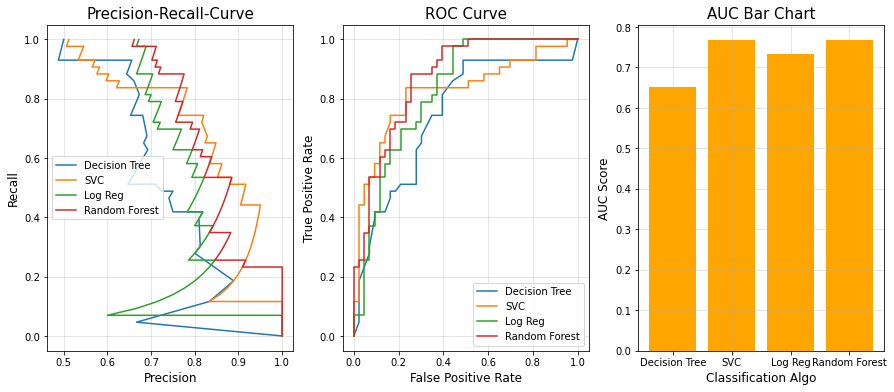

In [181]:
# Evaluating Random Forest Classifier:
evaluating_model(best_rand_forest_clf, 'Random Forest', save=True)

<h3>Voting Classifier:</h3>
<p>It is an ensemble technique where we train the data on different classifiers and then the prediction is done by each classifier and the predicted output is nothing but the majority</p>

In [185]:
from sklearn.ensemble import VotingClassifier
estimators = [('lr', best_model_1),
              ('dtc', dec_tree_best),
              ('svc', best_svc_clf),
              ('rfc', best_rand_forest_clf)]

voting_clf = VotingClassifier(estimators=estimators, voting='soft').fit(x_train, y_train)
voting_clf

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.03, random_state=42)),
                             ('dtc',
                              DecisionTreeClassifier(max_depth=11,
                                                     max_features=5,
                                                     max_leaf_nodes=35,
                                                     min_samples_leaf=5,
                                                     min_samples_split=20,
                                                     random_state=42)),
                             ('svc', SVC(C=1090, gamma=0.8, probability=True)),
                             ('rfc',
                              RandomForestClassifier(max_depth=12,
                                                     max_features=5,
                                                     max_leaf_nodes=26,
                                                     min_samples_leaf=2,
                         

Evaluation Table for Voting Clf
           Training Metrics  Validation Metrics
Accuracy           0.868074            0.790698
Precision          0.866142            0.820513
Recall             0.870712            0.744186
F1-Score           0.868421            0.780488
AUC Score          0.868074            0.790698


True

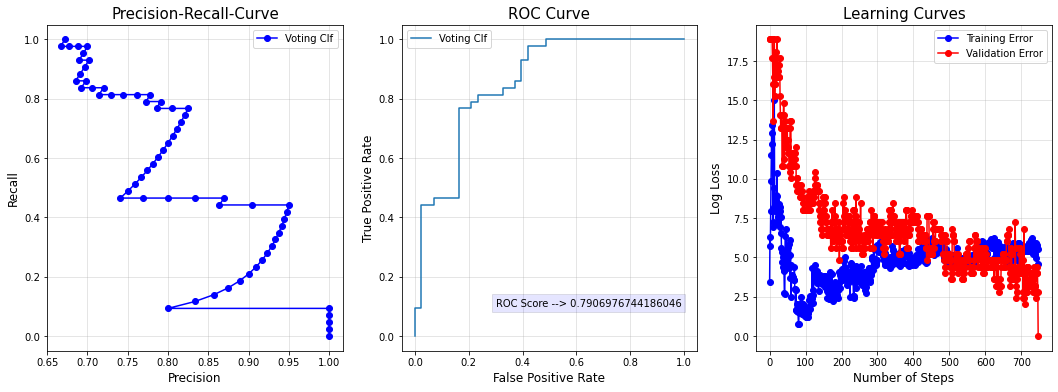

In [186]:
# evaluating Voting CLassifier:
evaluating_model(voting_clf, 'Voting Clf')

Evaluation Table for Voting Clf
           Training Metrics  Validation Metrics
Accuracy           0.866755            0.790698
Precision          0.863874            0.820513
Recall             0.870712            0.744186
F1-Score           0.867280            0.780488
AUC Score          0.866755            0.790698


True

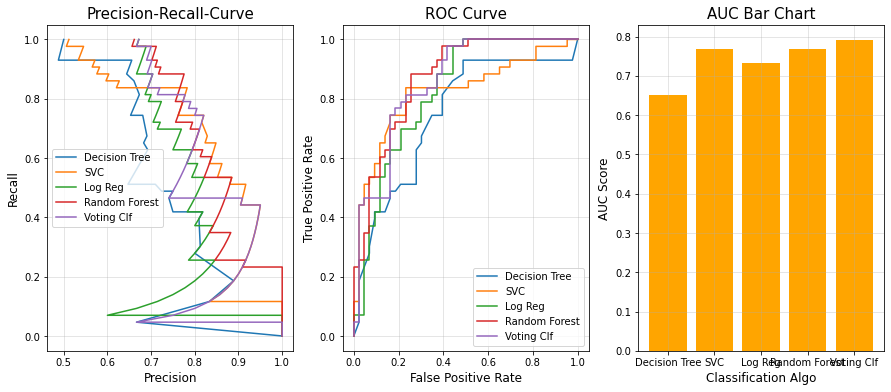

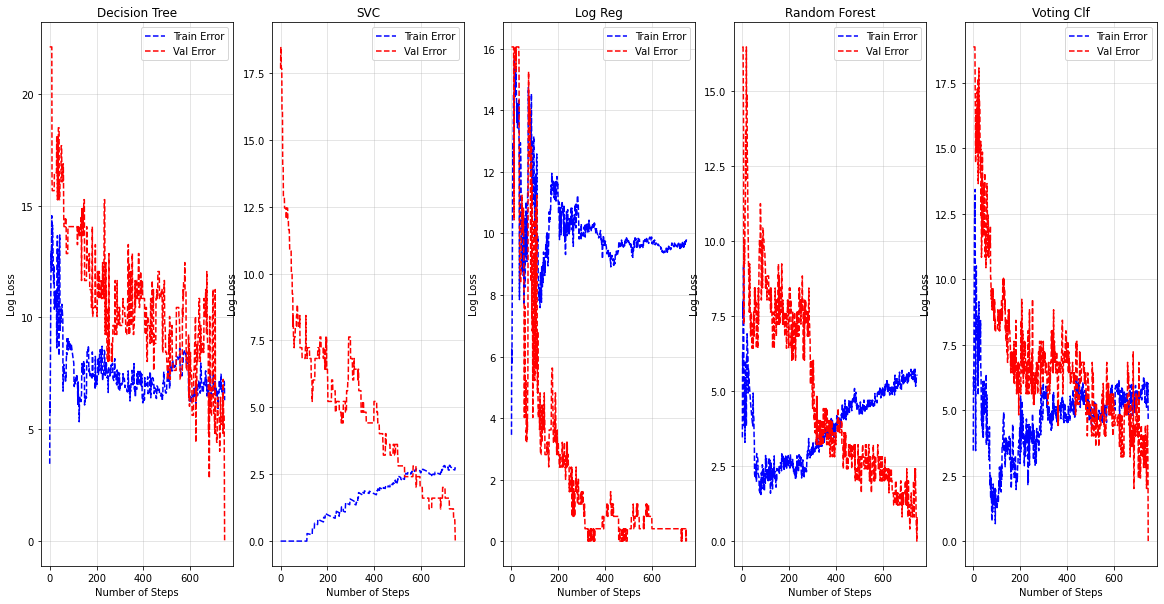

In [187]:
# evaluating Voting CLassifier:
evaluating_model(voting_clf, 'Voting Clf', save=True, learning_curves=True)

<h3>Saving the best model i.e. Support Vector Machines Classifier using Pickle:</h3>

In [190]:
import pickle

In [191]:
# saving the model to use it later in deployement:

file_open = open('best_voting_classifier_model.pkl', 'wb') # file handling in Python for writing bytes onto the disk:
pickle.dump(voting_clf, file_open)
file_open.close()

In [193]:
# loading the model using pickle:

file_read = open('best_voting_classifier_model.pkl', 'rb') # file handling in Python for reading bytes data:
model = pickle.load(file_read)
file_read.close()
model

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.03, random_state=42)),
                             ('dtc',
                              DecisionTreeClassifier(max_depth=11,
                                                     max_features=5,
                                                     max_leaf_nodes=35,
                                                     min_samples_leaf=5,
                                                     min_samples_split=20,
                                                     random_state=42)),
                             ('svc', SVC(C=1090, gamma=0.8, probability=True)),
                             ('rfc',
                              RandomForestClassifier(max_depth=12,
                                                     max_features=5,
                                                     max_leaf_nodes=26,
                                                     min_samples_leaf=2,
                         

<p>Use this trained model to predict for new instances.</p>

<h3>Planning and Building the logic of Backend of Deployment:</h3>

In [198]:
orig_copy_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'CombinedNumFeat'],
      dtype='object')

In [196]:
x_val.columns

Index(['Credit_History', 'Education', 'Loan_Amount_Term', 'Married',
       'Dependents_0', 'Property_Area_Semiurban', 'Self_Employed',
       'CombinedNumFeat', 'Property_Area_Rural', 'ApplicantIncome'],
      dtype='object')

In [205]:
# imp num features and categorical features for the final data:
imp_num_feats = []
imp_cat_feats = []

for feat in x_val.columns:
    if x_train[feat].nunique() > 3:
        imp_num_feats.append(feat)
    else:
        imp_cat_feats.append(feat)
        
imp_num_feats

['Loan_Amount_Term', 'CombinedNumFeat', 'ApplicantIncome']

<h3>Testing the code:</h3>

In [35]:
imp_cat_feats = ['Credit_History', 'Education', 'Married', 'Dependents_0', 'Property_Area_Semiurban', 'Self_Employed', 'Property_Area_Rural']

In [17]:
# function for preprocessing data:
# data will be inputted in json format from Front End and would be sent through API as POST request:

def engineer_new_feats(data):
    # engineering features in realtime:
    data['LogApplicantIncome'] = np.log(data['ApplicantIncome']+1)
    data['LogCoapplicantIncome'] = np.log(data['CoapplicantIncome']+1)
    data['LogLoanAmount'] = np.log(data['LoanAmount']+1)
    
#   computing first time:
    data['CombinedNumFeat'] = (data['LogLoanAmount']*data['LogCoapplicantIncome'])/data['LogLoanAmount']
    
#   final feats used in modelling:
    data['CombinedNumFeat'] = np.log(data['CombinedNumFeat']+1)
    data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term']+1)
    data['ApplicantIncome'] = data['LogApplicantIncome']
    return data

In [54]:
def encoding_cat_feats(data, imp_cat_feats):
    feats_updated = []
    
    # encoding values for Credit_History:
    if data['Credit_History'] == 'Yes':
        data['Credit_History'] = 0.0
    else:
        data['Credit_History'] = 1.0
        feats_updated.append('Credit_History')
        
    # encoding values for Education:
    if data['Education'] == 'Graduate':
        data['Education'] = 0.0
    else:
        data['Education'] = 1.0
        feats_updated.append('Education')
        
    # encoding values for Married:
    if data['Married'] == 'Yes':
        data['Married'] = 0.0
    else:
        data['Married'] = 1.0
        feats_updated.append('Married')
        
    # encoding values for Self_Employed:
    if data['Self_Employed'] == 'Yes':
        data['Self_Employed'] = 1.0
        feats_updated.append('Self_Employed')
    else:
        data['Self_Employed'] = 0.0
        
    # encoding values for Dependents:
    if data['Dependents'] == 0:
        data['Dependents_0'] = 1.0
        feats_updated.append('Dependents_0')
    else:
        data['Dependents_0'] = 0.0
        
    # encoding values for property_area:
    if (data['Property_Area'] == 'Rural'):
        data['Property_Area_Rural'] = 1.0
        feats_updated.append('Property_Area_Rural')
        
    elif (data['Property_Area'] == 'Semiurban'):
        data['Property_Area_Semiurban'] = 1.0
        feats_updated.append('Property_Area_Semiurban')
        
    else:
        pass
    
    # non-updated feats:
    non_updated_feats = list(set(imp_cat_feats).symmetric_difference(set(feats_updated)))
    
    # assigning the non-updated feats to 0:  
    for feat in non_updated_feats:
        data[feat] = 0.0
        
    return data

In [50]:
# testing the above function:
test_data = {'Credit_History': 'No', 
            'Education': 'Non-Graduate', 
            'Married': 'Yes',
            'Self_Employed': 'No',
            'Property_Area': 'Semiurban',
            'Dependents': 2}
encoding_cat_feats(test_data, imp_cat_feats)

Updated Feats --> ['Credit_History', 'Education', 'Property_Area_Semiurban']
Non-Updated Feats --> ['Property_Area_Rural', 'Married', 'Self_Employed', 'Dependents_0']


{'Credit_History': 1.0,
 'Education': 1.0,
 'Married': 0.0,
 'Self_Employed': 0.0,
 'Property_Area': 'Semiurban',
 'Dependents': 2,
 'Dependents_0': 0.0,
 'Property_Area_Semiurban': 1.0,
 'Property_Area_Rural': 0.0}

In [19]:
x_val.iloc[0, :]

NameError: name 'x_val' is not defined

In [51]:
# bringing the data in the form such that it can be passed to the model:

def final_data_to_pass(data):
    final_data_pass = np.array([data['Credit_History'],
                              data['Education'],
                              data['Loan_Amount_Term'],
                              data['Married'],
                              data['Dependents_0'],
                              data['Property_Area_Semiurban'],
                              data['Self_Employed'],
                              data['CombinedNumFeat'],
                              data['Property_Area_Rural'],
                              data['ApplicantIncome']])
    return final_data_pass

<h2>How data is passed and preprocessed in real-time?</h2>

In [52]:
['Loan_Amount_Term', 'CombinedNumFeat', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

['Loan_Amount_Term',
 'CombinedNumFeat',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount']

In [7]:
orig_copy_data[['Loan_Amount_Term', 'CombinedNumFeat', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

NameError: name 'orig_copy_data' is not defined

In [57]:
# dummy data on which we are testing:
dummy_data = {'Loan_Amount_Term': 720.0,
       'ApplicantIncome': 10,
       'CoapplicantIncome': 20,
       'LoanAmount': 1000000.00,
       'Credit_History': 'No',
       'Education': 'Non-Graduate',
       'Married': 'Yes',
       'Self_Employed': 'Yes',
       'Dependents': 2,
       'Property_Area': 'Rural'}

In [58]:
# all the preprocessing:

new_data = engineer_new_feats(dummy_data)
cat_encoded_data = encoding_cat_feats(new_data, imp_cat_feats)
final_data = final_data_to_pass(cat_encoded_data).reshape(1, 10)
print(final_data)

[[1.         1.         6.58063914 0.         0.         0.
  1.         1.39736348 1.         2.39789527]]


In [30]:
model.predict_proba(final_data)

array([[0.77905559, 0.22094441]])

<h3>Observation:</h3>
<p>
<ol>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
    </ol>
</p>